
Deterministic Environment Simulation:
Step 1:


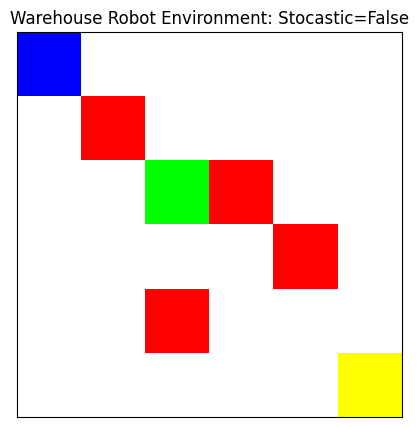

Action: Pick-up
State: (0, 0, False), Reward: -1, Total Reward: -1

Step 2:


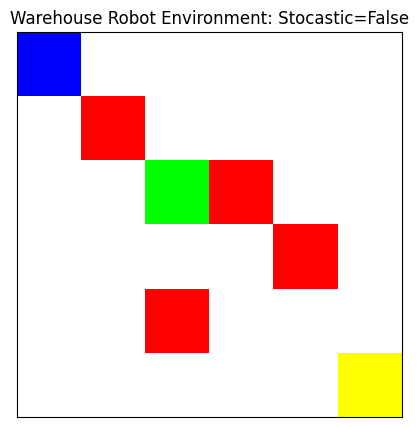

Action: Left
State: (0, 0, False), Reward: -1, Total Reward: -2

Step 3:


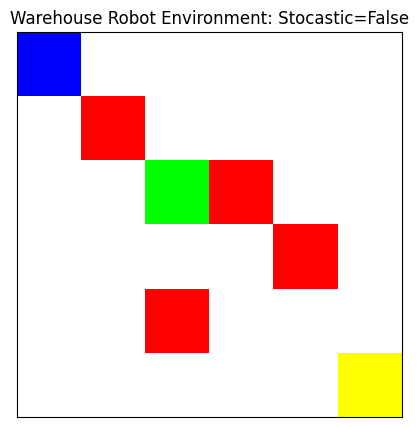

Action: Drop-off
State: (0, 0, False), Reward: -1, Total Reward: -3

Step 4:


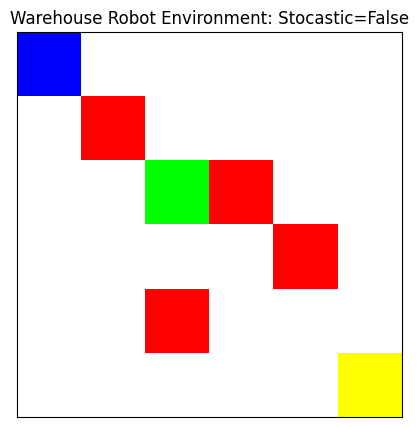

Action: Left
State: (0, 0, False), Reward: -1, Total Reward: -4

Step 5:


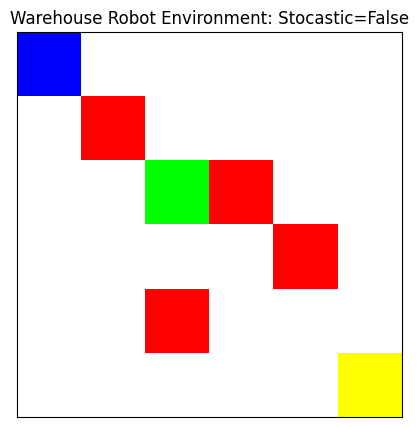

Action: Pick-up
State: (0, 0, False), Reward: -1, Total Reward: -5

Step 6:


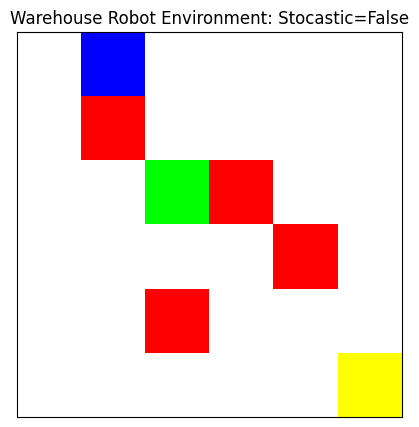

Action: Right
State: (0, 1, False), Reward: -1, Total Reward: -6

Step 7:


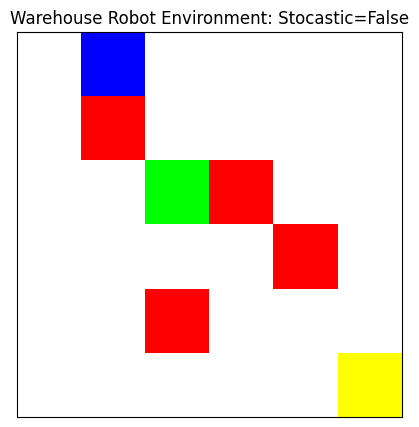

Action: Up
State: (0, 1, False), Reward: -1, Total Reward: -7

Step 8:


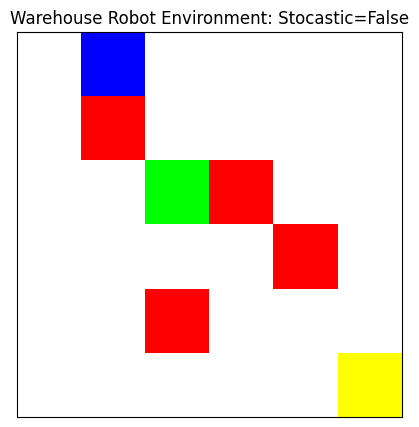

Action: Up
State: (0, 1, False), Reward: -1, Total Reward: -8

Step 9:


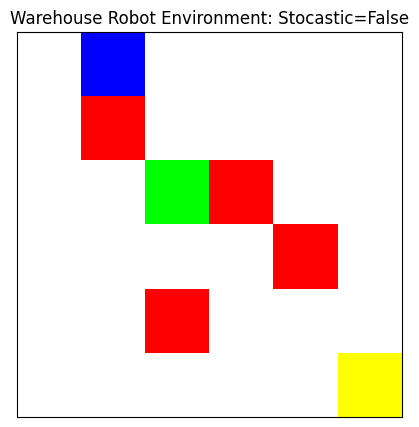

Action: Down
State: (0, 1, False), Reward: -20, Total Reward: -28

Step 10:


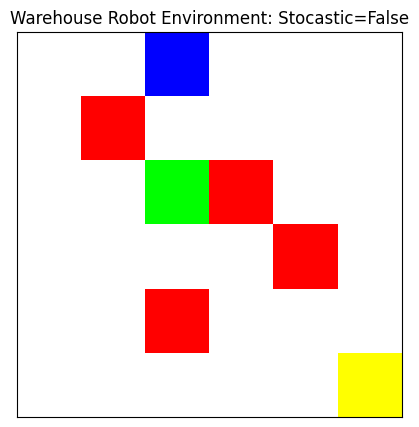

Action: Right
State: (0, 2, False), Reward: -1, Total Reward: -29


Stochastic Environment Simulation:
Step 1:


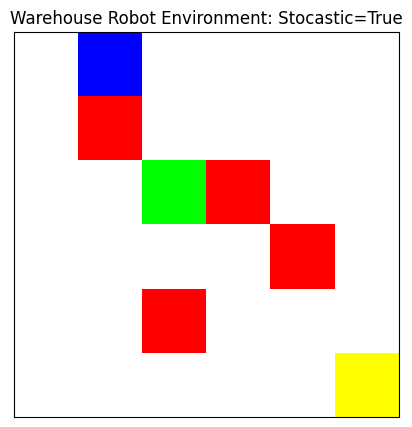

Action: Down
State: (0, 1, False), Reward: -1, Total Reward: -1

Step 2:


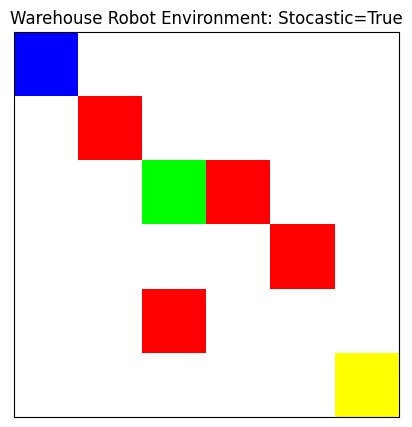

Action: Up
State: (0, 0, False), Reward: -1, Total Reward: -2

Step 3:


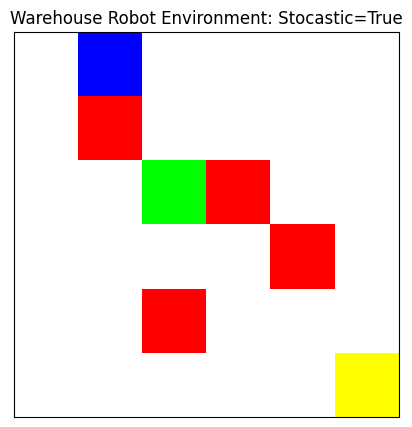

Action: Right
State: (0, 1, False), Reward: -1, Total Reward: -3

Step 4:


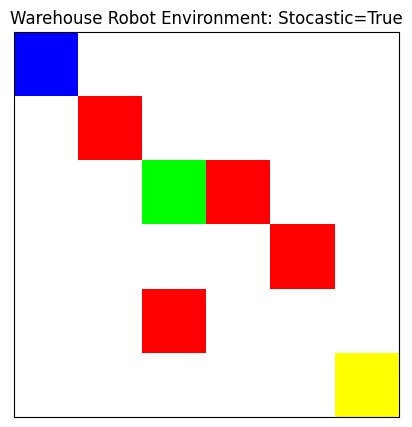

Action: Pick-up
State: (0, 0, False), Reward: -1, Total Reward: -4

Step 5:


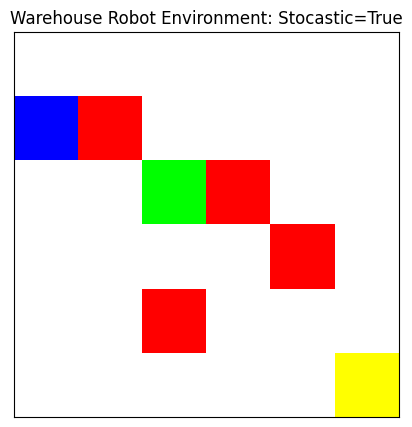

Action: Down
State: (1, 0, False), Reward: -1, Total Reward: -5

Step 6:


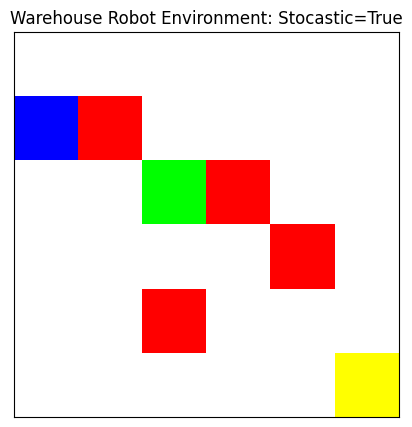

Action: Up
State: (1, 0, False), Reward: -20, Total Reward: -25

Step 7:


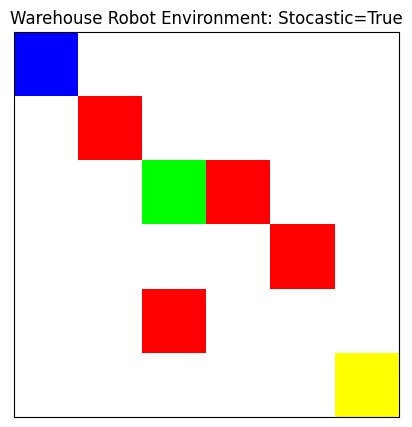

Action: Down
State: (0, 0, False), Reward: -1, Total Reward: -26

Step 8:


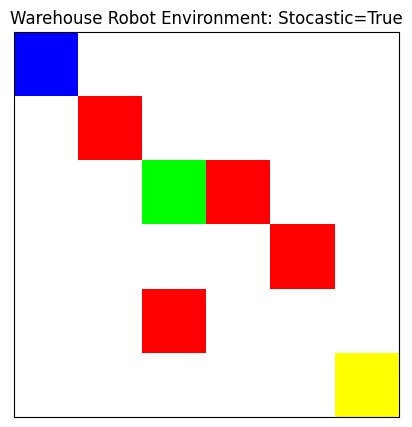

Action: Drop-off
State: (0, 0, False), Reward: -1, Total Reward: -27

Step 9:


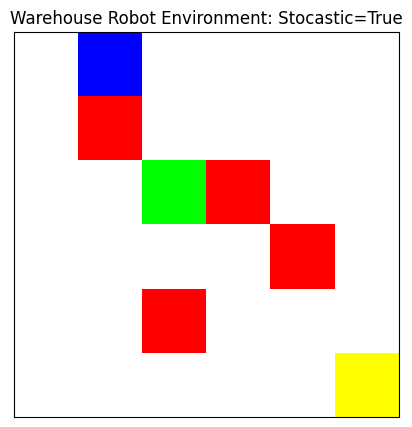

Action: Up
State: (0, 1, False), Reward: -1, Total Reward: -28

Step 10:


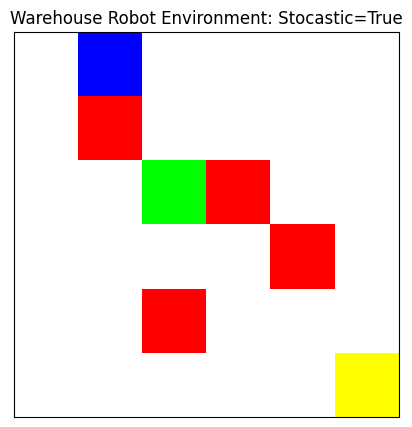

Action: Pick-up
State: (0, 1, False), Reward: -1, Total Reward: -29



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import random
import time

class WarehouseRobotEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, stochastic=False):
        super(WarehouseRobotEnv, self).__init__()
        self.grid_size = 6
        self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Up, Down, Left, Right, Pick-up, Drop-off
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        self.pickup_position = [2, 2]
        self.dropoff_position = [5, 5]
        self.pickup_attempted = False  # Flag to track pickup attempt was made or not
        self.carrying = False          # Flag to track if agent is carrying the package
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation()
    
    def _get_observation(self):
        return (self.agent_position[0], self.agent_position[1], self.carrying)
    
    def step(self, action):

        if self.stochastic and random.random() < 0.9:
            action = random.choice([0, 1, 2, 3])  # 10% chance of random movement(stochasticity)
        
        new_pos = self.agent_position[:]
        if action == 0:
            new_pos[0] -= 1  # Up
        elif action == 1:
            new_pos[0] += 1  # Down
        elif action == 2:
            new_pos[1] -= 1  # Left
        elif action == 3:
            new_pos[1] += 1  # Right
        
        reward = -1  # Default step penalty to encourage efficiency
        done = False

        if new_pos in self.obstacles:
            reward = -20  # Penalty for hitting an obstacle
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size: # Check if new position is within grid bounds
            self.agent_position = new_pos  # Move only if not hitting an obstacle

        if action == 4:  # Pick-up
            if self.agent_position == self.pickup_position:
                if not self.carrying:
                    self.carrying = True
                    reward = 25  # Reward for first-time pickup
                    self.pickup_attempted = True  # Mark as attempted
                else:
                    reward = -1  # Penalty for redundant pickup

        elif action == 5:  # Drop-off
            if self.agent_position == self.dropoff_position and self.carrying:
                reward = 100  # Reward for successful delivery
                done = True  # Task complete
            elif self.carrying:
                reward = -25  # Penalty for dropping off at wrong location
            self.carrying = False  # Reset carrying state
        
        self.timesteps += 1
        self.total_reward += reward

        if self.timesteps >= 50:
            done = True  # Terminate after max steps
        
        return self._get_observation(), reward, done, {}
    
    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))  # White background

        # Set colors for different elements
        for obs in self.obstacles:
            grid[tuple(obs)] = [1, 0, 0]  # Obstacles (Red)
        
        grid[tuple(self.pickup_position)] = [0, 1, 0]  # Pickup location (Green)
        grid[tuple(self.dropoff_position)] = [1, 1, 0]  # Drop-off location (Yellow)
        grid[tuple(self.agent_position)] = [0, 0, 1]  # Agent (Blue)

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot Environment: Stocastic={self.stochastic}")
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.show()
        time.sleep(0.1)  # Pause to visualize movement step by step

# Function to simulate an environment
def run_simulation(stochastic=False):
    print(f"\n{'Stochastic' if stochastic else 'Deterministic'} Environment Simulation:")
    env = WarehouseRobotEnv(stochastic=stochastic)
    obs = env.reset()
    total_reward = 0
    
    for step in range(10):
        action = env.action_space.sample()  # Choosing random random action from 0-5 (Up, Down, Left, Right, Pick-up, Drop-off)
        next_obs, reward, done, _ = env.step(action)
        total_reward += reward

        print(f"Step {step + 1}:")
        env.render()
        action_names = ['Up', 'Down', 'Left', 'Right', 'Pick-up', 'Drop-off']
        print(f"Action: {action_names[action]}")
        print(f"State: {next_obs}, Reward: {reward}, Total Reward: {total_reward}\n")
        
        if done:
            break

# Main function to run both simulations
def main():
    run_simulation(stochastic=False)  # Deterministic run
    run_simulation(stochastic=True)  # Stochastic run

if __name__ == "__main__":
    main()


Q- Learning Algorithm Determinsitic Env

False
Episode 0, Reward: -25147, Epsilon: 0.995
Episode 100, Reward: 43, Epsilon: 0.6027415843082742
Episode 200, Reward: 112, Epsilon: 0.36512303261753626
Episode 300, Reward: 95, Epsilon: 0.2211807388415433
Episode 400, Reward: 85, Epsilon: 0.13398475271138335
Episode 500, Reward: 114, Epsilon: 0.0811640021330769
Episode 600, Reward: 115, Epsilon: 0.04916675299948831
Episode 700, Reward: 113, Epsilon: 0.029783765425331846
Episode 800, Reward: 115, Epsilon: 0.018042124582040707
Episode 900, Reward: 115, Epsilon: 0.010929385683282892

Initial Q-table for Deterministic Environment:
Too large to print fully, showing a sample: [((0, 0, 0), array([287.45777731, 291.77670923, 287.21366452, 284.91820726,
       287.33723947, 287.01601744])), ((0, 0, 1), array([ 9.63671552,  9.67183631, 19.62172568, 12.94434233, 40.16965167,
       74.00905517])), ((0, 1, 0), array([245.18548046, 223.15910852, 240.52866285, 293.45676472,
       245.04889968, 233.08144963])), ((0, 1, 1), array([ 14.16123244,  

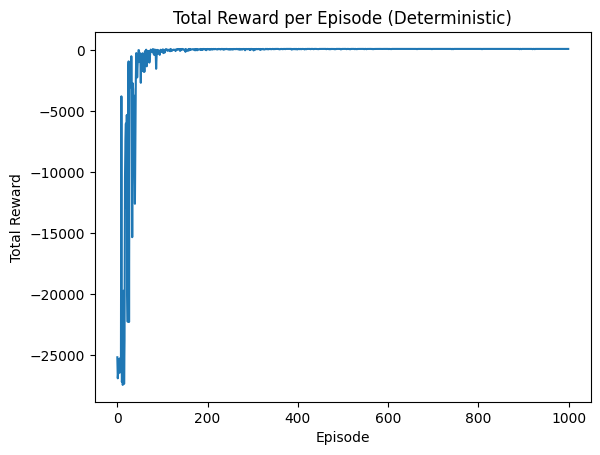

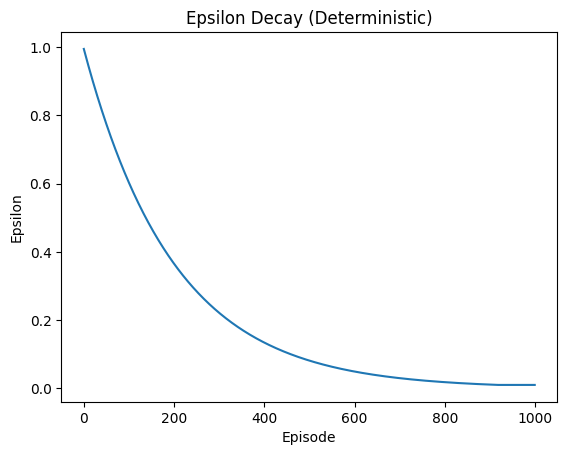

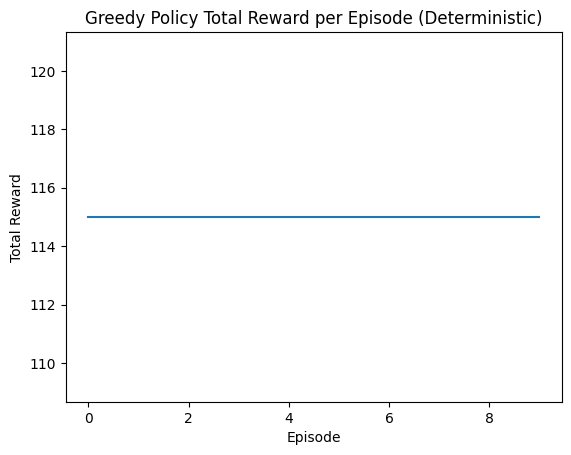


Rendering one episode with learned policy:


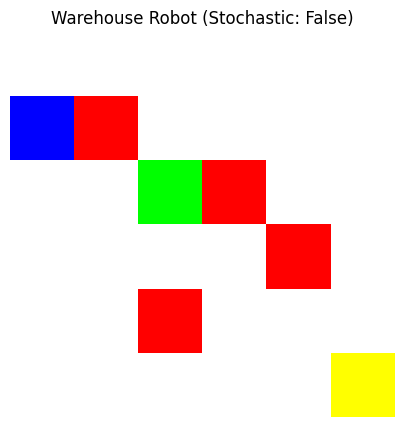

Action: Down, Reward: -1


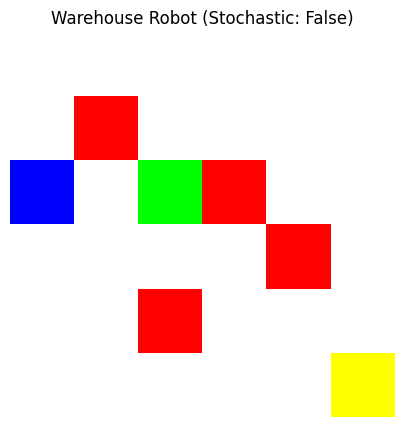

Action: Down, Reward: -1


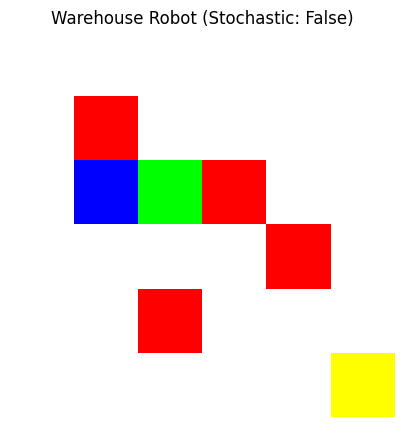

Action: Right, Reward: -1


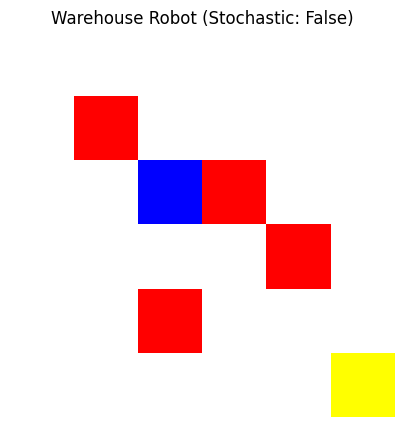

Action: Right, Reward: -1


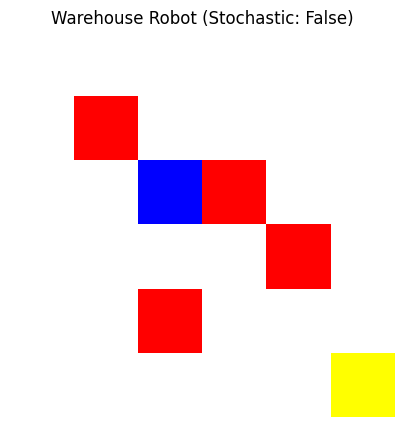

Action: Pickup, Reward: 25


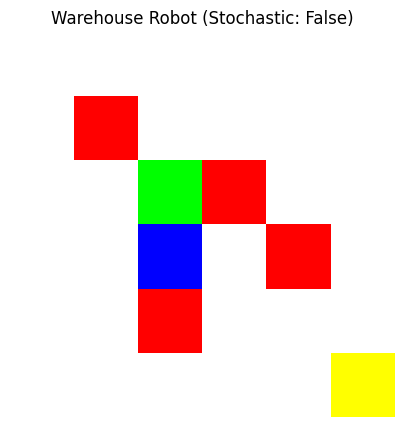

Action: Down, Reward: -1


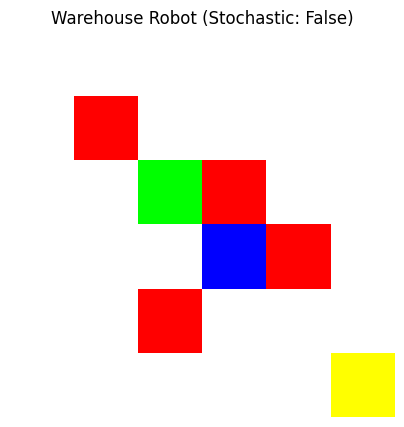

Action: Right, Reward: -1


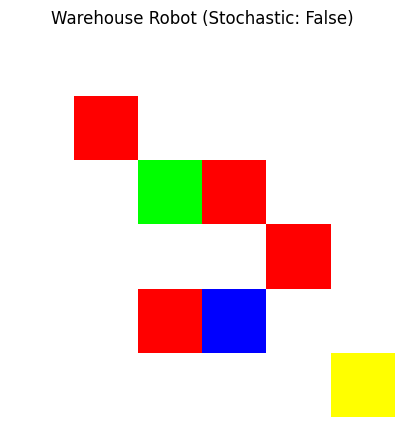

Action: Down, Reward: -1


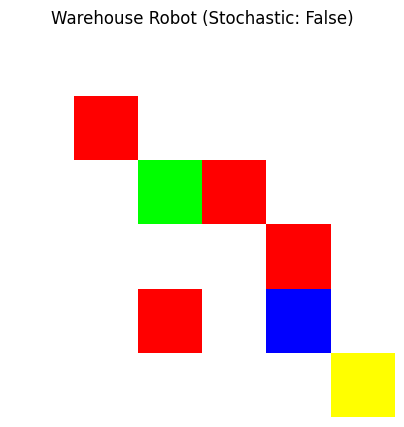

Action: Right, Reward: -1


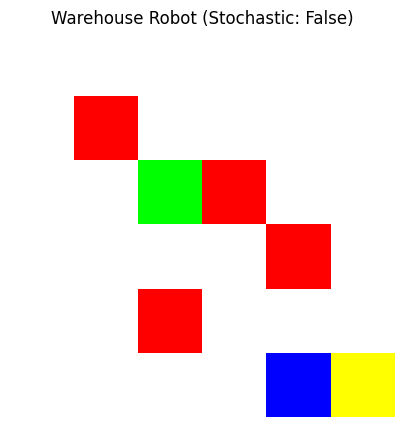

Action: Down, Reward: -1


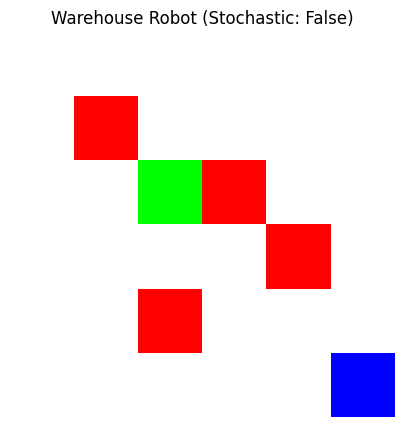

Action: Right, Reward: -1


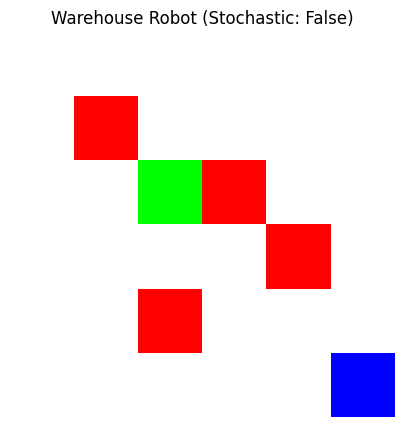

Action: Dropoff, Reward: 100
Task Completed!


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle

class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False):
        super().__init__()
        self.grid_size = 6
        self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Up, Down, Left, Right, Pick-up, Drop-off
        
        self.stochastic = stochastic
        print(self.stochastic)
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        self.pickup_position = [2, 2]
        self.dropoff_position = [5, 5]
        self.pickup_attempted = False
        self.carrying = False
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
    # Handle stochastic movement: 10% chance to stay in place
        if self.stochastic and random.random() < 0.1:
            print("Stochastic: Staying in place")
            return self._get_observation(), -1, False, False, {}

        new_pos = self.agent_position.copy()
        
        if action == 0: new_pos[0] -= 1  # Up
        elif action == 1: new_pos[0] += 1  # Down
        elif action == 2: new_pos[1] -= 1  # Left
        elif action == 3: new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if action == 4:  # Pick-up
            if self.agent_position == self.pickup_position and not self.carrying:
                self.carrying = True
                reward = 25
                self.pickup_attempted = True
            elif self.carrying:
                reward = -1

        elif action == 5:  # Drop-off
            if self.agent_position == self.dropoff_position and self.carrying:
                reward = 100
                terminated = True  # Successful termination
            elif self.carrying:
                reward = -25
            self.carrying = False

        # Handle time-based truncation
        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Episode truncation due to time limit

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Set element colors
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]  # Obstacles
        grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]  # Pickup
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]  # Dropoff
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]  # Agent

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

def q_learning(env, episodes, max_step=10000, alpha=0.2, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all possible states in the grid with both carrying statuses.
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in [0, 1]:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)  # Convert to tuple for hashing
        total_reward = 0
        done = False
        step_count = 0  # Initialize step counter for the current episode
        
        while not done and step_count < max_step:
            # Choose action using an epsilon-greedy strategy
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                # Ensure state exists in the Q-table (should always be true after initialization)
                if state not in q_table:
                    q_table[state] = np.zeros(env.action_space.n)
                action = np.argmax(q_table[state])  # Exploit

            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            
            # Initialize next_state in Q-table if it doesn't exist
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Q-learning update
            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value
            
            state = next_state
            total_reward += reward
            step_count += 1  # Increment the step counter
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

def run_simulation_with_q_learning(stochastic=False):
    env = WarehouseRobotEnv(stochastic)
    episodes = 1000
    q_table, rewards, epsilons = q_learning(env, episodes)
    
    # Save Q-table
    with open(f'q_table_{"stochastic" if stochastic else "deterministic"}.pkl', 'wb') as file:
        pickle.dump(q_table, file)
    
    # Print Q-tables
    print(f"\nInitial Q-table for {'Stochastic' if stochastic else 'Deterministic'} Environment:")
    print("Too large to print fully, showing a sample:", list(q_table.items())[:10])
    
    print(f"\nFinal Q-table for {'Stochastic' if stochastic else 'Deterministic'} Environment:")
    print("Too large to print fully, showing a sample:", list(q_table.items())[-10:])

    # Plot total reward per episode
    plt.figure()
    plt.plot(rewards)
    plt.title(f"Total Reward per Episode ({'Stochastic' if stochastic else 'Deterministic'})")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"reward_plot_{'stochastic' if stochastic else 'deterministic'}.png")
    plt.show()

    # Plot epsilon decay
    plt.figure()
    plt.plot(epsilons)
    plt.title(f"Epsilon Decay ({'Stochastic' if stochastic else 'Deterministic'})")
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.savefig(f"epsilon_plot_{'stochastic' if stochastic else 'deterministic'}.png")
    plt.show()

    # Greedy policy for 10 episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    plt.figure()
    plt.plot(greedy_rewards)
    plt.title(f"Greedy Policy Total Reward per Episode ({'Stochastic' if stochastic else 'Deterministic'})")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"greedy_reward_plot_{'stochastic' if stochastic else 'deterministic'}.png")
    plt.show()

    # Render one episode with greedy policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with learned policy:")
    for _ in range(50):  # max steps
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        print(f"Action: {['Up','Down','Left','Right','Pickup','Dropoff'][action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state

if __name__ == "__main__":
    run_simulation_with_q_learning(stochastic=False)
    # run_simulation_with_q_learning(stochastic=True)

Q Learning Stochastic Env

True
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochasti

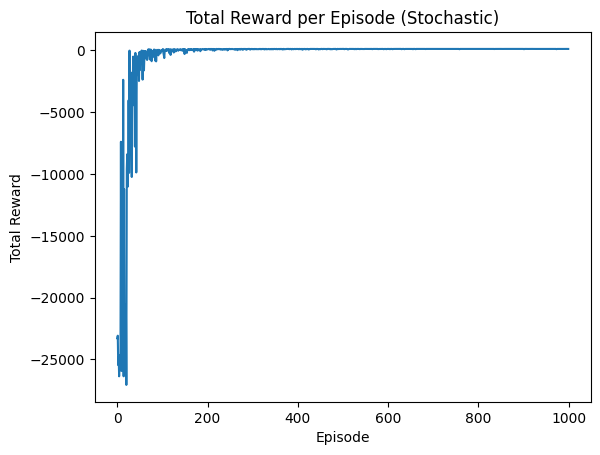

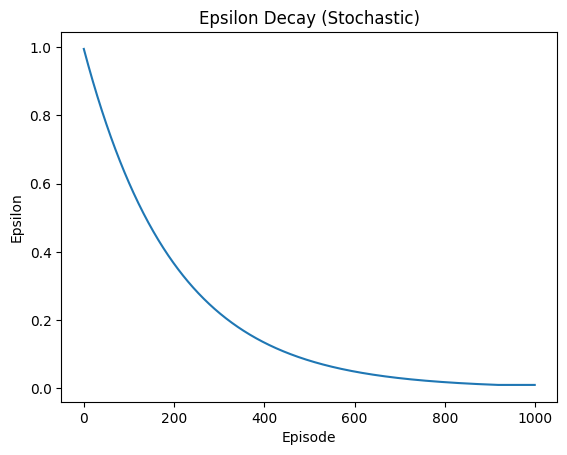

Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place


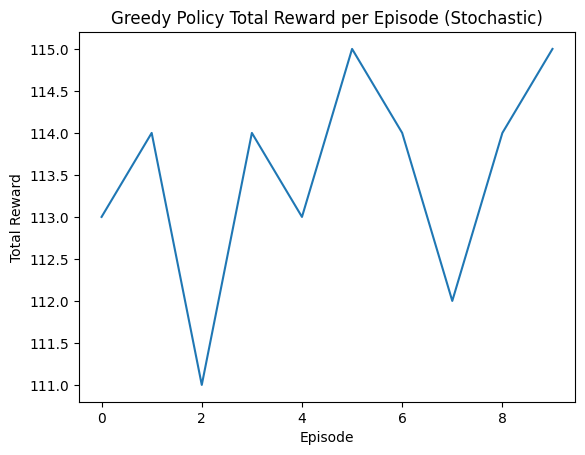


Rendering one episode with learned policy:


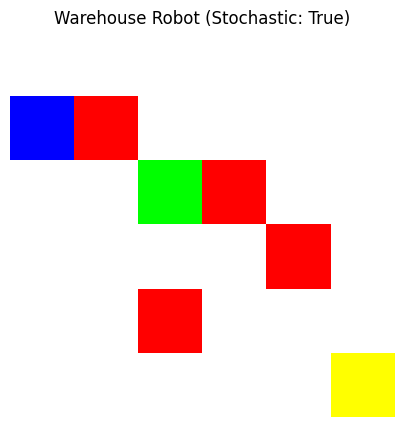

Action: Down, Reward: -1


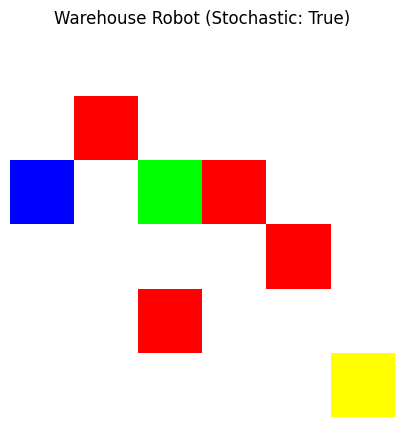

Action: Down, Reward: -1
Stochastic: Staying in place


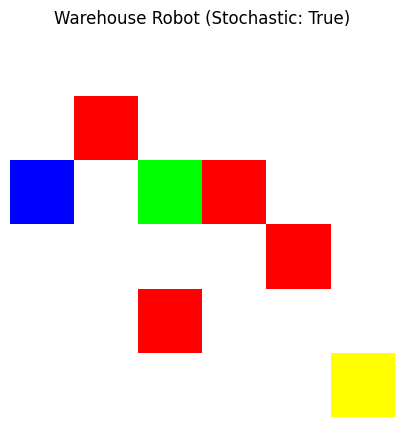

Action: Right, Reward: -1


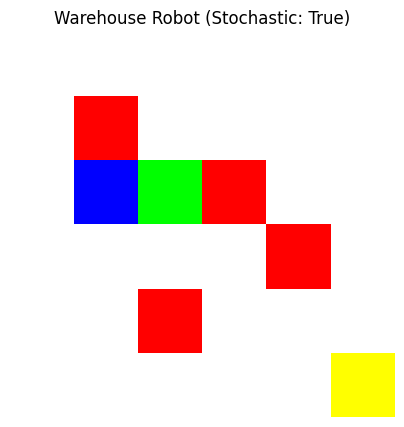

Action: Right, Reward: -1


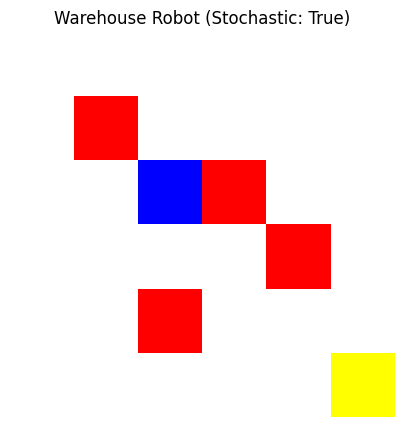

Action: Right, Reward: -1


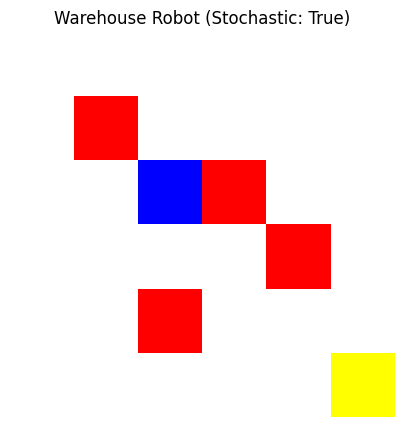

Action: Pickup, Reward: 25


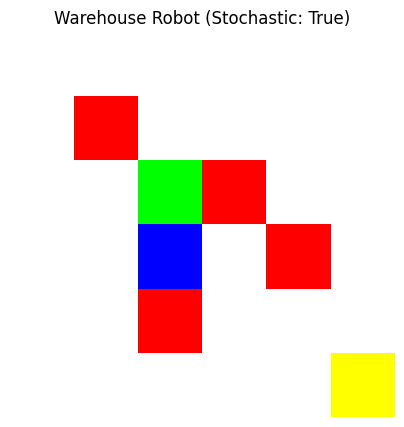

Action: Down, Reward: -1


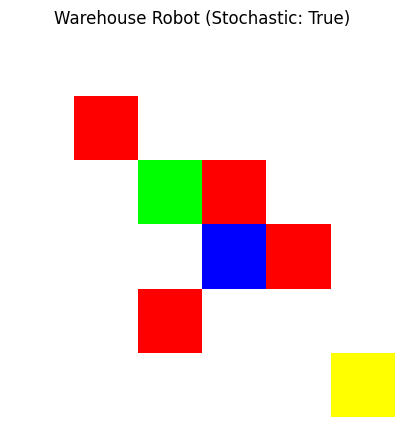

Action: Right, Reward: -1


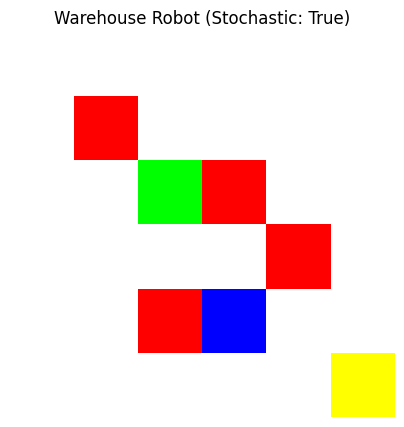

Action: Down, Reward: -1


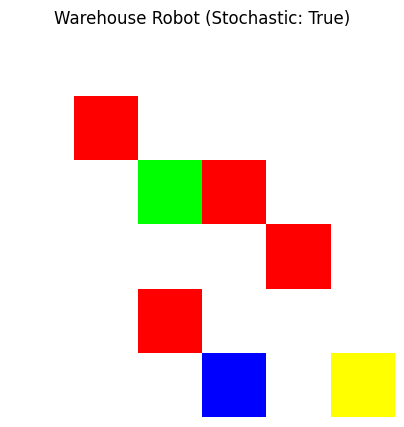

Action: Down, Reward: -1


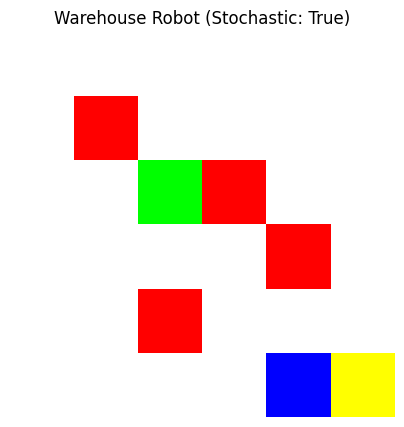

Action: Right, Reward: -1
Stochastic: Staying in place


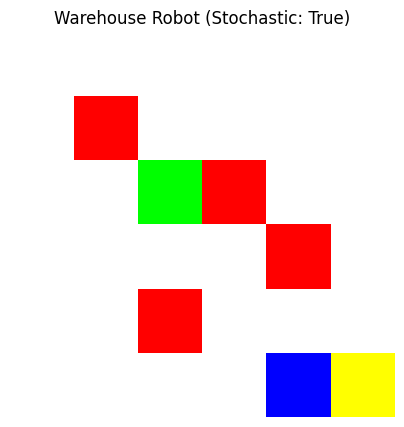

Action: Right, Reward: -1


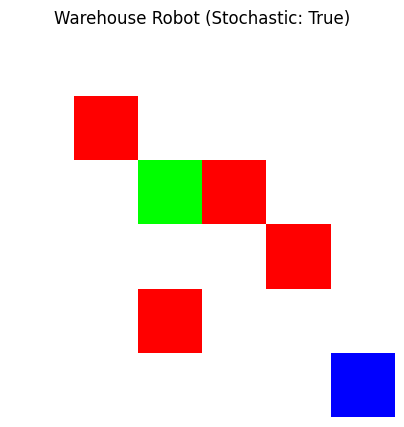

Action: Right, Reward: -1


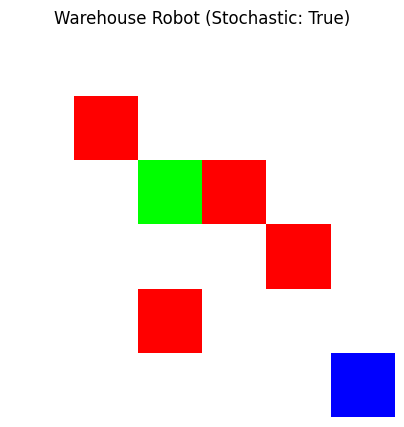

Action: Dropoff, Reward: 100
Task Completed!


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle

class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False):
        super().__init__()
        self.grid_size = 6
        self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Up, Down, Left, Right, Pick-up, Drop-off
        
        self.stochastic = stochastic
        print(self.stochastic)
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        self.pickup_position = [2, 2]
        self.dropoff_position = [5, 5]
        self.pickup_attempted = False
        self.carrying = False
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
    # Handle stochastic movement: 10% chance to stay in place
        if self.stochastic and random.random() < 0.1:
            print("Stochastic: Staying in place")
            return self._get_observation(), -1, False, False, {}

        new_pos = self.agent_position.copy()
        
        if action == 0: new_pos[0] -= 1  # Up
        elif action == 1: new_pos[0] += 1  # Down
        elif action == 2: new_pos[1] -= 1  # Left
        elif action == 3: new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if action == 4:  # Pick-up
            if self.agent_position == self.pickup_position and not self.carrying:
                self.carrying = True
                reward = 25
                self.pickup_attempted = True
            elif self.carrying:
                reward = -1

        elif action == 5:  # Drop-off
            if self.agent_position == self.dropoff_position and self.carrying:
                reward = 100
                terminated = True  # Successful termination
            elif self.carrying:
                reward = -25
            self.carrying = False

        # Handle time-based truncation
        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Episode truncation due to time limit

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Set element colors
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]  # Obstacles
        grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]  # Pickup
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]  # Dropoff
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]  # Agent

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

def q_learning(env, episodes, max_step=10000, alpha=0.2, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all possible states in the grid with both carrying statuses.
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in [0, 1]:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)  # Convert to tuple for hashing
        total_reward = 0
        done = False
        step_count = 0  # Initialize step counter for the current episode
        
        while not done and step_count < max_step:
            # Choose action using an epsilon-greedy strategy
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                # Ensure state exists in the Q-table (should always be true after initialization)
                if state not in q_table:
                    q_table[state] = np.zeros(env.action_space.n)
                action = np.argmax(q_table[state])  # Exploit

            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            
            # Initialize next_state in Q-table if it doesn't exist
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Q-learning update
            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value
            
            state = next_state
            total_reward += reward
            step_count += 1  # Increment the step counter
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

def run_simulation_with_q_learning(stochastic=False):
    env = WarehouseRobotEnv(stochastic)
    episodes = 1000
    q_table, rewards, epsilons = q_learning(env, episodes)
    
    # Save Q-table
    with open(f'q_table_{"stochastic" if stochastic else "deterministic"}.pkl', 'wb') as file:
        pickle.dump(q_table, file)
    
    # Print Q-tables
    print(f"\nInitial Q-table for {'Stochastic' if stochastic else 'Deterministic'} Environment:")
    print("Too large to print fully, showing a sample:", list(q_table.items())[:10])
    
    print(f"\nFinal Q-table for {'Stochastic' if stochastic else 'Deterministic'} Environment:")
    print("Too large to print fully, showing a sample:", list(q_table.items())[-10:])

    # Plot total reward per episode
    plt.figure()
    plt.plot(rewards)
    plt.title(f"Total Reward per Episode ({'Stochastic' if stochastic else 'Deterministic'})")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"reward_plot_{'stochastic' if stochastic else 'deterministic'}.png")
    plt.show()

    # Plot epsilon decay
    plt.figure()
    plt.plot(epsilons)
    plt.title(f"Epsilon Decay ({'Stochastic' if stochastic else 'Deterministic'})")
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.savefig(f"epsilon_plot_{'stochastic' if stochastic else 'deterministic'}.png")
    plt.show()

    # Greedy policy for 10 episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    plt.figure()
    plt.plot(greedy_rewards)
    plt.title(f"Greedy Policy Total Reward per Episode ({'Stochastic' if stochastic else 'Deterministic'})")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"greedy_reward_plot_{'stochastic' if stochastic else 'deterministic'}.png")
    plt.show()

    # Render one episode with greedy policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with learned policy:")
    for _ in range(50):  # max steps
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        print(f"Action: {['Up','Down','Left','Right','Pickup','Dropoff'][action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state

if __name__ == "__main__":
    run_simulation_with_q_learning(stochastic=True)

Hyperparameter tunning for Q learning learning Determinstic Env

[I 2025-02-19 07:26:52,871] A new study created in memory with name: no-name-e3247af7-c30e-49be-a7f5-5791ec33685f
[I 2025-02-19 07:26:53,052] Trial 0 finished with value: 115.0 and parameters: {'gamma': 0.9687366821547194, 'epsilon_decay': 0.9542302053745603, 'alpha': 0.25061550071976224}. Best is trial 0 with value: 115.0.


Episode 0, Reward: -13322, Epsilon: 0.9542302053745603
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 113, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 105, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.969, epsilon_decay=0.954,  learning_rate=0.251, avg_reward=115.00
Episode 0, Reward: -13029, Epsilon: 0.9313968655922522
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 114, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01


[I 2025-02-19 07:26:53,176] Trial 1 finished with value: 115.0 and parameters: {'gamma': 0.9298341931735213, 'epsilon_decay': 0.9313968655922522, 'alpha': 0.3067765279820636}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:53,281] Trial 2 finished with value: 115.0 and parameters: {'gamma': 0.9554285484625273, 'epsilon_decay': 0.9457191534142113, 'alpha': 0.3741883500463993}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:53,549] Trial 3 finished with value: 115.0 and parameters: {'gamma': 0.9842675912109358, 'epsilon_decay': 0.9879031135534052, 'alpha': 0.41484781054620745}. Best is trial 0 with value: 115.0.


Trial: gamma=0.930, epsilon_decay=0.931,  learning_rate=0.307, avg_reward=115.00
Episode 0, Reward: -13800, Epsilon: 0.9457191534142113
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 114, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.955, epsilon_decay=0.946,  learning_rate=0.374, avg_reward=115.00
Episode 0, Reward: -12513, Epsilon: 0.9879031135534052
Episode 100, Reward: 92, Epsilon: 0.29251609913960147
Episode 200, Reward: 115, Epsilon: 0.08661342097412429
Episode 300, Reward: 115, Epsilon: 0.025646057481645296
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Epi

[I 2025-02-19 07:26:53,731] Trial 4 finished with value: 115.0 and parameters: {'gamma': 0.9969058503885648, 'epsilon_decay': 0.9703718144245775, 'alpha': 0.16393916114252743}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:53,859] Trial 5 finished with value: 115.0 and parameters: {'gamma': 0.9715805936026884, 'epsilon_decay': 0.9457207282233333, 'alpha': 0.35083958490283784}. Best is trial 0 with value: 115.0.


Episode 0, Reward: -13554, Epsilon: 0.9703718144245775
Episode 100, Reward: 115, Epsilon: 0.047946346419676975
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 113, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.997, epsilon_decay=0.970,  learning_rate=0.164, avg_reward=115.00
Episode 0, Reward: -13158, Epsilon: 0.9457207282233333
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 113, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.972, epsilon_decay=0.946,  learning_rate=0.351, avg_reward

[I 2025-02-19 07:26:53,988] Trial 6 finished with value: 115.0 and parameters: {'gamma': 0.9176264099134824, 'epsilon_decay': 0.9476946382193063, 'alpha': 0.18989795567829046}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:54,134] Trial 7 finished with value: 115.0 and parameters: {'gamma': 0.9295047468759906, 'epsilon_decay': 0.9709162168488545, 'alpha': 0.34908662269263596}. Best is trial 0 with value: 115.0.


Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.918, epsilon_decay=0.948,  learning_rate=0.190, avg_reward=115.00
Episode 0, Reward: -10485, Epsilon: 0.9709162168488545
Episode 100, Reward: 115, Epsilon: 0.05074079361786206
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.930, epsilon_decay=0.971,  learning_rate=0.349, avg_reward=115.00
Episode 0, Reward: -12760, Epsilon: 0.9207036459362925
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon

[I 2025-02-19 07:26:54,249] Trial 8 finished with value: 115.0 and parameters: {'gamma': 0.9064656092664454, 'epsilon_decay': 0.9207036459362925, 'alpha': 0.4517906408591079}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:54,425] Trial 9 finished with value: 115.0 and parameters: {'gamma': 0.9952032948697933, 'epsilon_decay': 0.9763232286941368, 'alpha': 0.1229369563766663}. Best is trial 0 with value: 115.0.


Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.906, epsilon_decay=0.921,  learning_rate=0.452, avg_reward=115.00
Episode 0, Reward: -13195, Epsilon: 0.9763232286941368
Episode 100, Reward: 111, Epsilon: 0.08891107055956343
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 114, Epsilon: 0.01
Episode 600, Reward: 114, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.995, epsilon_decay=0.976,  learning_rate=0.123, avg_reward=115.00
Episode 0, Reward: -13250, Epsilon: 0.9084337481314999
Episode 100, Reward: 115, Epsilon: 0.01


[I 2025-02-19 07:26:54,529] Trial 10 finished with value: 115.0 and parameters: {'gamma': 0.9655383270528969, 'epsilon_decay': 0.9084337481314999, 'alpha': 0.2423741296357773}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:54,641] Trial 11 finished with value: 115.0 and parameters: {'gamma': 0.9368462672661982, 'epsilon_decay': 0.9244703496194103, 'alpha': 0.2702061345288121}. Best is trial 0 with value: 115.0.


Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 114, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.966, epsilon_decay=0.908,  learning_rate=0.242, avg_reward=115.00
Episode 0, Reward: -12914, Epsilon: 0.9244703496194103
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.937, epsilon_decay=0.924,  learning_rate=0.270, avg_reward=115.00
Episode 0, Reward: -12653, Epsilon: 0.9309699738474687
Episode 100, Reward: 115, Epsilon: 0.01
Episode 

[I 2025-02-19 07:26:54,738] Trial 12 finished with value: 115.0 and parameters: {'gamma': 0.9458809787991486, 'epsilon_decay': 0.9309699738474687, 'alpha': 0.29322854190119074}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:54,848] Trial 13 finished with value: 115.0 and parameters: {'gamma': 0.9288079217316663, 'epsilon_decay': 0.9577835327592633, 'alpha': 0.21365692689439025}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:54,929] Trial 14 finished with value: 115.0 and parameters: {'gamma': 0.9543090691582177, 'epsilon_decay': 0.9021706389631479, 'alpha': 0.31052137902882304}. Best is trial 0 with value: 115.0.


Trial: gamma=0.946, epsilon_decay=0.931,  learning_rate=0.293, avg_reward=115.00
Episode 0, Reward: -12332, Epsilon: 0.9577835327592633
Episode 100, Reward: 115, Epsilon: 0.012823422675837946
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.929, epsilon_decay=0.958,  learning_rate=0.214, avg_reward=115.00
Episode 0, Reward: -12808, Epsilon: 0.9021706389631479
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilo

[I 2025-02-19 07:26:55,057] Trial 15 finished with value: 115.0 and parameters: {'gamma': 0.9733594672862873, 'epsilon_decay': 0.9354522737647164, 'alpha': 0.24691432106287603}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:55,228] Trial 16 finished with value: 115.0 and parameters: {'gamma': 0.9004502205537968, 'epsilon_decay': 0.956100873586927, 'alpha': 0.10221594985531487}. Best is trial 0 with value: 115.0.
[I 2025-02-19 07:26:55,326] Trial 17 finished with value: 115.0 and parameters: {'gamma': 0.9450335585872869, 'epsilon_decay': 0.9146406225016911, 'alpha': 0.48339187471950607}. Best is trial 0 with value: 115.0.


Episode 0, Reward: -12984, Epsilon: 0.9354522737647164
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 113, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.973, epsilon_decay=0.935,  learning_rate=0.247, avg_reward=115.00
Episode 0, Reward: -12817, Epsilon: 0.956100873586927
Episode 100, Reward: 115, Epsilon: 0.010736808711848992
Episode 200, Reward: 114, Epsilon: 0.01
Episode 300, Reward: 113, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 114, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.900, epsilon_decay=0.956,  learning_rate=0.102, avg_reward=

[I 2025-02-19 07:26:55,436] Trial 18 finished with value: 115.0 and parameters: {'gamma': 0.9213978411485184, 'epsilon_decay': 0.9356481076070932, 'alpha': 0.3245133883591872}. Best is trial 0 with value: 115.0.


Episode 0, Reward: -11441, Epsilon: 0.9356481076070932
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.921, epsilon_decay=0.936,  learning_rate=0.325, avg_reward=115.00
Episode 0, Reward: -12963, Epsilon: 0.997605684475106


[I 2025-02-19 07:26:56,526] Trial 19 finished with value: 115.0 and parameters: {'gamma': 0.9610093841554506, 'epsilon_decay': 0.997605684475106, 'alpha': 0.15849807396216128}. Best is trial 0 with value: 115.0.


Episode 100, Reward: -7219, Epsilon: 0.7849652460955006
Episode 200, Reward: -131, Epsilon: 0.6176492848494249
Episode 300, Reward: -52, Epsilon: 0.4859968526919888
Episode 400, Reward: 25, Epsilon: 0.3824062402729073
Episode 500, Reward: 115, Epsilon: 0.3008960485847836
Episode 600, Reward: 81, Epsilon: 0.23675981853570952
Episode 700, Reward: 114, Epsilon: 0.18629427650083416
Episode 800, Reward: 112, Epsilon: 0.14658550454892652
Episode 900, Reward: 114, Epsilon: 0.1153406886537769
Trial: gamma=0.961, epsilon_decay=0.998,  learning_rate=0.158, avg_reward=115.00

Best hyperparameters found:
  Average Reward: 115.0
  gamma: 0.9687366821547194
  epsilon_decay: 0.9542302053745603
  alpha: 0.25061550071976224
Episode 0, Reward: -295, Epsilon: 0.9542302053745603
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 114, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 113, Epsi

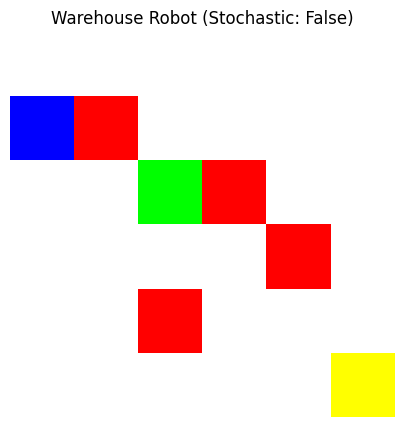

Action: Down, Reward: -1


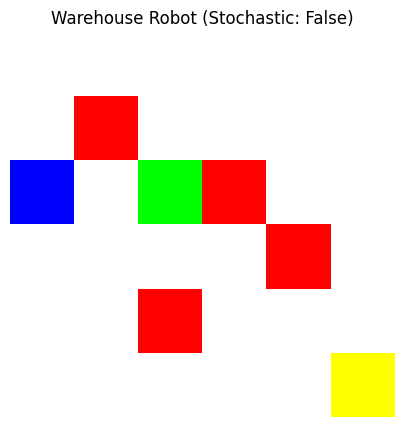

Action: Down, Reward: -1


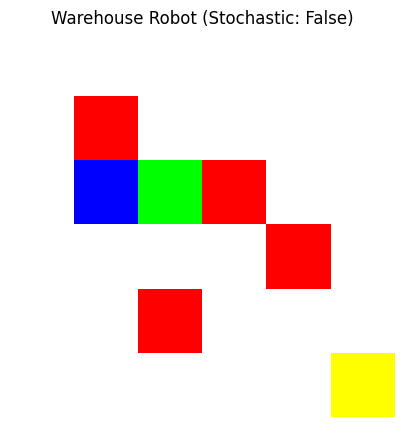

Action: Right, Reward: -1


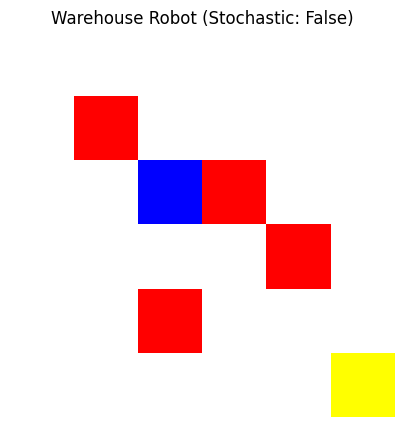

Action: Right, Reward: -1


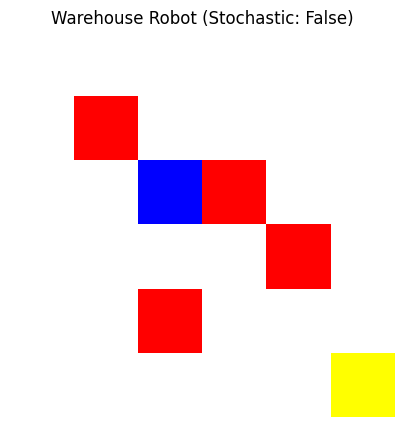

Action: Pickup, Reward: 25


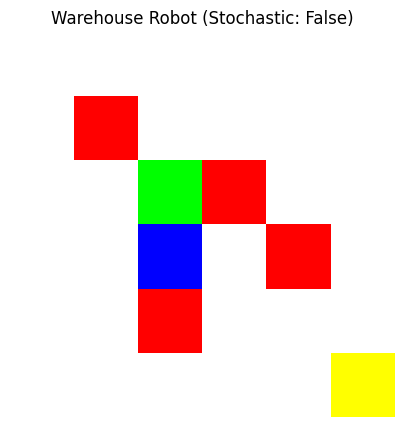

Action: Down, Reward: -1


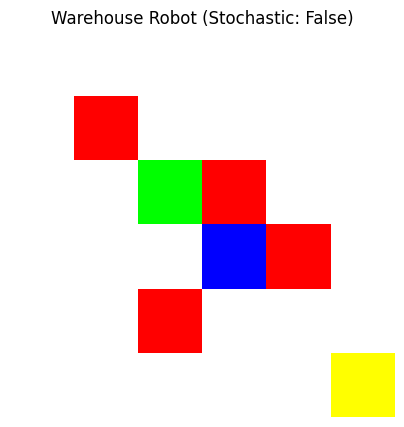

Action: Right, Reward: -1


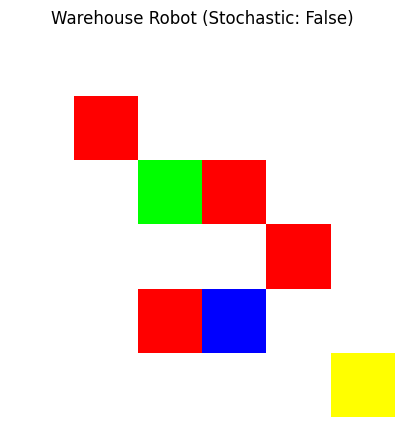

Action: Down, Reward: -1


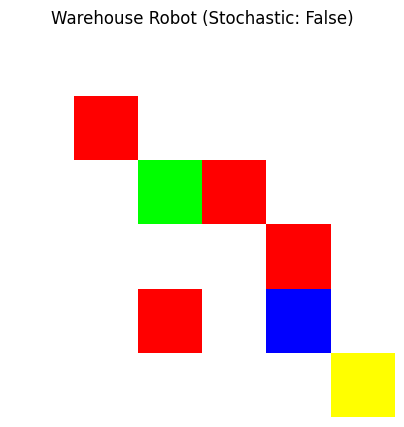

Action: Right, Reward: -1


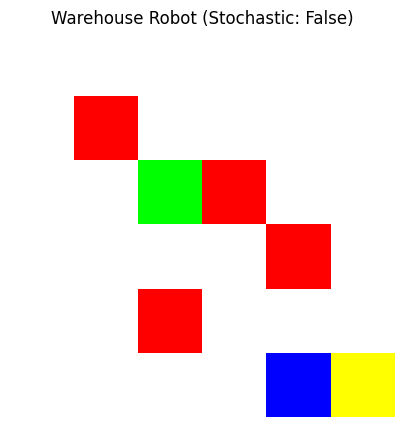

Action: Down, Reward: -1


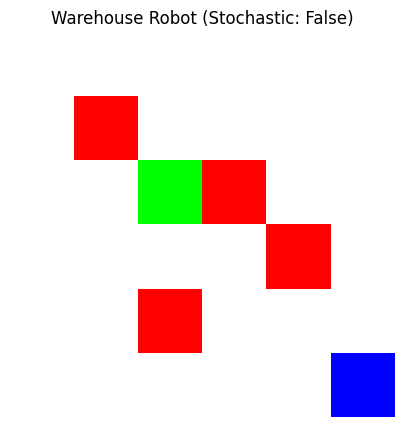

Action: Right, Reward: -1


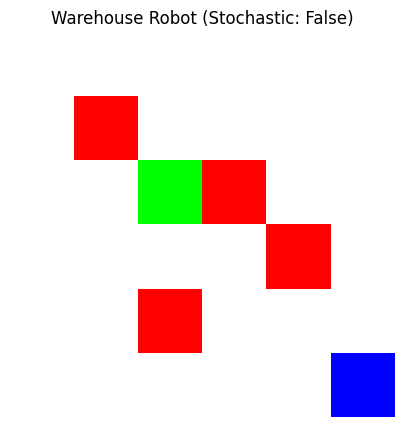

Action: Dropoff, Reward: 100
Task Completed!


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle
import optuna

# Define the WarehouseRobotEnv environment
class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False):
        super().__init__()
        self.grid_size = 6
        self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Up, Down, Left, Right, Pick-up, Drop-off
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        self.pickup_position = [2, 2]
        self.dropoff_position = [5, 5]
        self.pickup_attempted = False
        self.carrying = False
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
        # Handle stochastic movement
        if self.stochastic and random.random() < 0.1:
            print("Stochastic: Staying in place")
            return self._get_observation(), -1, False, False, {}

        new_pos = self.agent_position.copy()
        if action == 0: new_pos[0] -= 1  # Up
        elif action == 1: new_pos[0] += 1  # Down
        elif action == 2: new_pos[1] -= 1  # Left
        elif action == 3: new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if action == 4:  # Pick-up
            if self.agent_position == self.pickup_position and not self.carrying:
                self.carrying = True
                reward = 25
                self.pickup_attempted = True
            elif self.carrying:
                reward = -1

        elif action == 5:  # Drop-off
            if self.agent_position == self.dropoff_position and self.carrying:
                reward = 100
                terminated = True  # Successful termination
            elif self.carrying:
                reward = -25
            self.carrying = False

        # Handle time-based truncation
        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Episode truncation due to time limit

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Set element colors
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]  # Obstacles
        grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]  # Pickup
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]  # Dropoff
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]  # Agent

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

# Q-learning implementation
def q_learning(env, episodes, max_step=100, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all possible states in the grid with both carrying statuses.
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in [0, 1]:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)  # Convert to tuple for hashing
        total_reward = 0
        done = False
        step_count = 0  # Initialize step counter for the current episode
        
        while not done and step_count < max_step:
            # Choose action using an epsilon-greedy strategy
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_table[state])  # Exploit

            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            
            # Initialize next_state in Q-table if it doesn't exist
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Q-learning update
            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value
            
            state = next_state
            total_reward += reward
            step_count += 1  # Increment the step counter
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

# Define the objective function for hyperparameter tuning using Optuna
def objective(trial):
    # Hyperparameter search space for discount factor and epsilon decay rate
    gamma = trial.suggest_float('gamma', 0.90, 0.999)
    epsilon_decay = trial.suggest_float('epsilon_decay', 0.90, 0.999)
    alpha = trial.suggest_float('alpha', 0.1, 0.5)
    
    # Create a new instance of the environment
    env = WarehouseRobotEnv(stochastic=False)
    
    # Set a fixed number of episodes and max steps for training
    episodes = 1000
    max_steps = 5000

    # Train the agent using Q-learning with the sampled hyperparameters
    q_table, rewards, epsilons = q_learning(
        env,
        episodes=episodes,
        max_step=max_steps,
        alpha=alpha,
        gamma=gamma,
        epsilon=1.0,
        epsilon_decay=epsilon_decay,
        epsilon_min=0.01
    )
    
    # Evaluate the learned (greedy) policy over 10 episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    avg_reward = np.mean(greedy_rewards)
    print(f"Trial: gamma={gamma:.3f}, epsilon_decay={epsilon_decay:.3f},  learning_rate={alpha:.3f}, avg_reward={avg_reward:.2f}")
    
    # Since higher average reward indicates a better policy, we maximize this value.
    return avg_reward

if __name__ == "__main__":
    # Run hyperparameter tuning with Optuna
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20)

    print("\nBest hyperparameters found:")
    trial = study.best_trial
    print(f"  Average Reward: {trial.value}")
    for key, value in trial.params.items():
        print(f"  {key}: {value}")

    # Optionally, you can run a final simulation using the best hyperparameters
    best_gamma = trial.params['gamma']
    best_epsilon_decay = trial.params['epsilon_decay']
    best_alpha = trial.params['alpha']
    env = WarehouseRobotEnv(stochastic=False)
    q_table, rewards, epsilons = q_learning(
        env,
        episodes=1000,
        max_step=50,
        alpha=best_alpha,
        gamma=best_gamma,
        epsilon=1.0,
        epsilon_decay=best_epsilon_decay,
        epsilon_min=0.01
    )
    
    # Render one episode with the learned policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with the learned policy:")
    for _ in range(50):  # maximum steps per episode
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        print(f"Action: {['Up','Down','Left','Right','Pickup','Dropoff'][action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state


Hyperparameter Tuning for Stochastic Env

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-02-20 02:00:42,602] A new study created in memory with name: no-name-bf6bc4f3-61ea-4bcb-8ace-12205210767b
[I 2025-02-20 02:00:42,693] Trial 0 finished with value: 115.0 and parameters: {'gamma': 0.982381023354578, 'epsilon_decay': 0.9014088734442135, 'alpha': 0.3529603513796905}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:42,788] Trial 1 finished with value: 115.0 and parameters: {'gamma': 0.9109979033255884, 'epsilon_decay': 0.9071512824406721, 'alpha': 0.20500586543065508}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:42,894] Trial 2 finished with value: 115.0 and parameters: {'gamma': 0.9788274500920491, 'epsilon_decay': 0.9332077072318374, 'alpha': 0.19803943348702316}. Be

Episode 0, Reward: -12165, Epsilon: 0.9014088734442135
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.982, epsilon_decay=0.901,  learning_rate=0.353, avg_reward=115.00
Episode 0, Reward: -13191, Epsilon: 0.9071512824406721
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.911, epsilon_decay=0.907,  learning_rate=0.205, avg_reward=115.00
Episode 

[I 2025-02-20 02:00:43,014] Trial 3 finished with value: 115.0 and parameters: {'gamma': 0.916082159873071, 'epsilon_decay': 0.9334169531190555, 'alpha': 0.21001204779397817}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:43,197] Trial 4 finished with value: 115.0 and parameters: {'gamma': 0.9731638870498159, 'epsilon_decay': 0.9824793184698871, 'alpha': 0.39953817678493486}. Best is trial 0 with value: 115.0.


Episode 0, Reward: -12696, Epsilon: 0.9334169531190555
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 114, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 95, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 107, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.916, epsilon_decay=0.933,  learning_rate=0.210, avg_reward=115.00
Episode 0, Reward: -12047, Epsilon: 0.9824793184698871
Episode 100, Reward: 115, Epsilon: 0.1677510033823585
Episode 200, Reward: 115, Epsilon: 0.028642230535309256
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 111, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.973, epsilon_decay=0.982,  learning_rate=0.40

[I 2025-02-20 02:00:43,287] Trial 5 finished with value: 115.0 and parameters: {'gamma': 0.9326545785559273, 'epsilon_decay': 0.9001837676556877, 'alpha': 0.43383865154128176}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:43,388] Trial 6 finished with value: 115.0 and parameters: {'gamma': 0.9761688180945698, 'epsilon_decay': 0.9220223451570225, 'alpha': 0.3589684739216482}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:43,493] Trial 7 finished with value: 115.0 and parameters: {'gamma': 0.9211468901655985, 'epsilon_decay': 0.9253578125563546, 'alpha': 0.3027192482524088}. Best is trial 0 with value: 115.0.


Episode 0, Reward: -12813, Epsilon: 0.9001837676556877
Episode 100, Reward: 111, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 95, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 113, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 114, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.933, epsilon_decay=0.900,  learning_rate=0.434, avg_reward=115.00
Episode 0, Reward: -12663, Epsilon: 0.9220223451570225
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 113, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.976, epsilon_decay=0.922,  learning_rate=0.359, avg_reward=115.00
Episode 0

[I 2025-02-20 02:00:43,587] Trial 8 finished with value: 115.0 and parameters: {'gamma': 0.9226044458693496, 'epsilon_decay': 0.933152846955861, 'alpha': 0.33343235250809666}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:43,760] Trial 9 finished with value: 115.0 and parameters: {'gamma': 0.9381622166775866, 'epsilon_decay': 0.9680121576868695, 'alpha': 0.3452960589921896}. Best is trial 0 with value: 115.0.


Episode 0, Reward: -13273, Epsilon: 0.933152846955861
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 95, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.923, epsilon_decay=0.933,  learning_rate=0.333, avg_reward=115.00
Episode 0, Reward: -12085, Epsilon: 0.9680121576868695
Episode 100, Reward: 115, Epsilon: 0.037494019030490315
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 114, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.938, epsilon_decay=0.968,  learning_rate=0.345, avg_reward=1

[I 2025-02-20 02:00:43,904] Trial 10 finished with value: 115.0 and parameters: {'gamma': 0.996161405458241, 'epsilon_decay': 0.955862329392405, 'alpha': 0.4976431852735168}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:44,013] Trial 11 finished with value: 115.0 and parameters: {'gamma': 0.9557971079859944, 'epsilon_decay': 0.9002349858242005, 'alpha': 0.12906022381105545}. Best is trial 0 with value: 115.0.


Episode 100, Reward: 115, Epsilon: 0.010469597432507614
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 114, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.996, epsilon_decay=0.956,  learning_rate=0.498, avg_reward=115.00
Episode 0, Reward: -12317, Epsilon: 0.9002349858242005
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.956, epsilon_decay=0.900,  learning_rate=0.129, avg_reward=115.00
Episode 0, Reward: -12599, Epsilon: 0.910058869

[I 2025-02-20 02:00:44,123] Trial 12 finished with value: 115.0 and parameters: {'gamma': 0.9009473892569009, 'epsilon_decay': 0.9100588694613952, 'alpha': 0.23445712691201698}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:44,222] Trial 13 finished with value: 115.0 and parameters: {'gamma': 0.9544330567400114, 'epsilon_decay': 0.9143646832592067, 'alpha': 0.2603208950620173}. Best is trial 0 with value: 115.0.


Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.901, epsilon_decay=0.910,  learning_rate=0.234, avg_reward=115.00
Episode 0, Reward: -12619, Epsilon: 0.9143646832592067
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.954, epsilon_decay=0.914,  learning_rate=0.260, avg_reward=115.00
Episode 0, Reward: -13584, Epsilon: 0.9444872451179046


[I 2025-02-20 02:00:44,373] Trial 14 finished with value: 115.0 and parameters: {'gamma': 0.9946642319515112, 'epsilon_decay': 0.9444872451179046, 'alpha': 0.10707062113245641}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:44,468] Trial 15 finished with value: 115.0 and parameters: {'gamma': 0.9009629594306238, 'epsilon_decay': 0.9122412545003565, 'alpha': 0.1745633529259674}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:44,844] Trial 16 finished with value: 115.0 and parameters: {'gamma': 0.9636356867560222, 'epsilon_decay': 0.9922862969571606, 'alpha': 0.2737445707222661}. Best is trial 0 with value: 115.0.


Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.995, epsilon_decay=0.944,  learning_rate=0.107, avg_reward=115.00
Episode 0, Reward: -13666, Epsilon: 0.9122412545003565
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 94, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 113, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 95, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.901, epsilon_decay=0.912,  learning_rate=0.175, avg_reward=115.00
Episode 0, Reward: -12799, Epsilon: 0.9922862969571606
Episode 10

[I 2025-02-20 02:00:44,988] Trial 17 finished with value: 115.0 and parameters: {'gamma': 0.9438574898098006, 'epsilon_decay': 0.9514343579329411, 'alpha': 0.42155368903696055}. Best is trial 0 with value: 115.0.
[I 2025-02-20 02:00:45,087] Trial 18 finished with value: 115.0 and parameters: {'gamma': 0.9852875278949454, 'epsilon_decay': 0.9003821069562673, 'alpha': 0.3059327527732836}. Best is trial 0 with value: 115.0.


Episode 0, Reward: -12929, Epsilon: 0.9514343579329411
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.944, epsilon_decay=0.951,  learning_rate=0.422, avg_reward=115.00
Episode 0, Reward: -12909, Epsilon: 0.9003821069562673
Episode 100, Reward: 115, Epsilon: 0.01
Episode 200, Reward: 115, Epsilon: 0.01
Episode 300, Reward: 115, Epsilon: 0.01
Episode 400, Reward: 115, Epsilon: 0.01
Episode 500, Reward: 115, Epsilon: 0.01
Episode 600, Reward: 115, Epsilon: 0.01
Episode 700, Reward: 115, Epsilon: 0.01
Episode 800, Reward: 115, Epsilon: 0.01
Episode 900, Reward: 115, Epsilon: 0.01
Trial: gamma=0.985, epsilon_decay=0.900,  learning_rate=0.306, avg_reward=115.00
Episode 

[I 2025-02-20 02:00:45,203] Trial 19 finished with value: 115.0 and parameters: {'gamma': 0.9660569372258957, 'epsilon_decay': 0.9214952104757821, 'alpha': 0.17099493405458296}. Best is trial 0 with value: 115.0.


Trial: gamma=0.966, epsilon_decay=0.921,  learning_rate=0.171, avg_reward=115.00

Best hyperparameters found:
  Average Reward: 115.0
  gamma: 0.982381023354578
  epsilon_decay: 0.9014088734442135
  alpha: 0.3529603513796905
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Episode 0, Reward: -145, Epsilon: 0.9014088734442135
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in pla

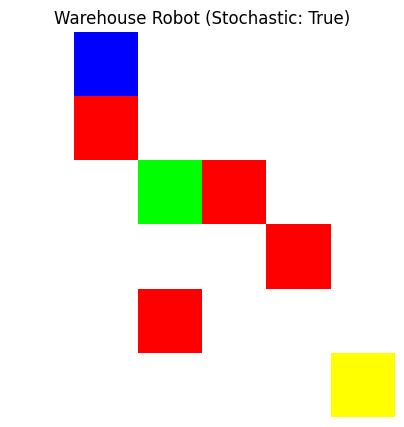

Action: Right, Reward: -1


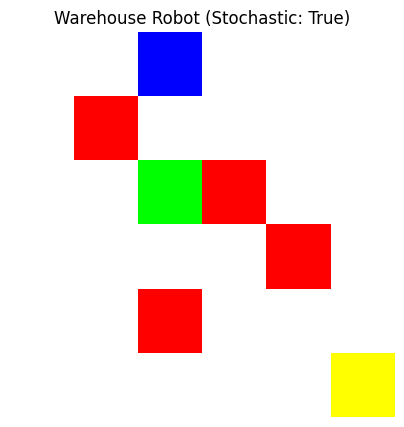

Action: Right, Reward: -1


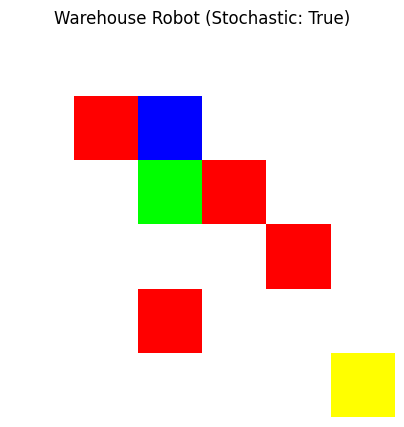

Action: Down, Reward: -1


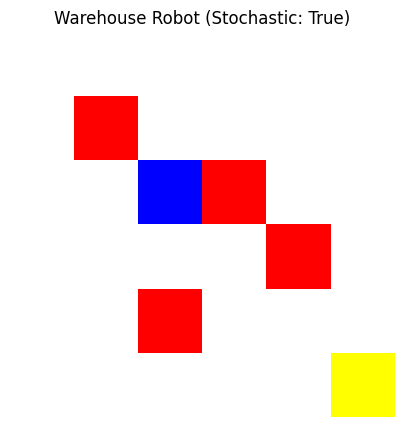

Action: Down, Reward: -1


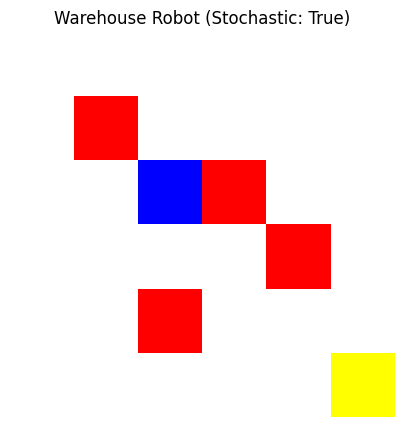

Action: Pickup, Reward: 25


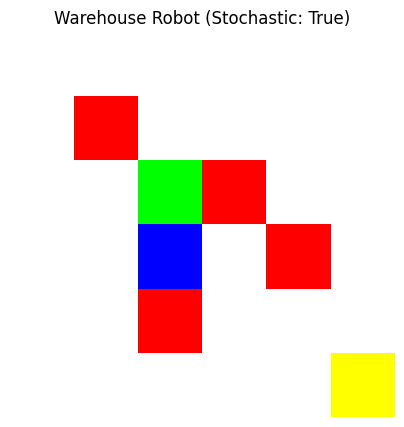

Action: Down, Reward: -1


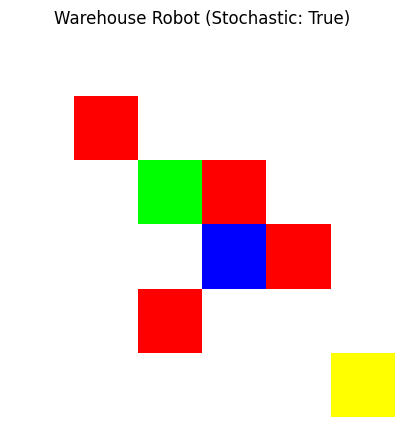

Action: Right, Reward: -1


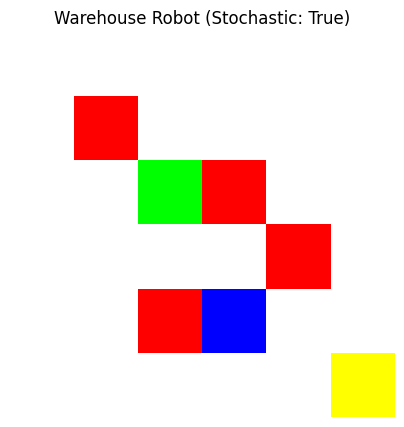

Action: Down, Reward: -1


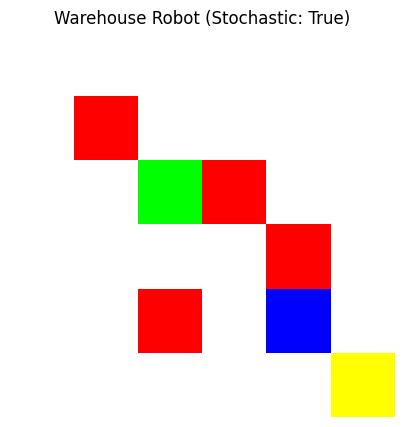

Action: Right, Reward: -1


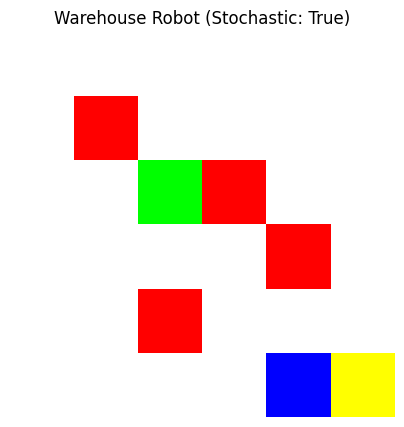

Action: Down, Reward: -1


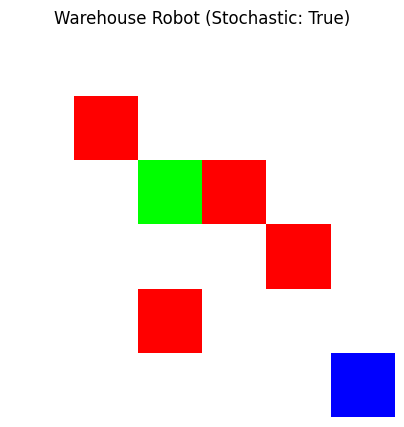

Action: Right, Reward: -1


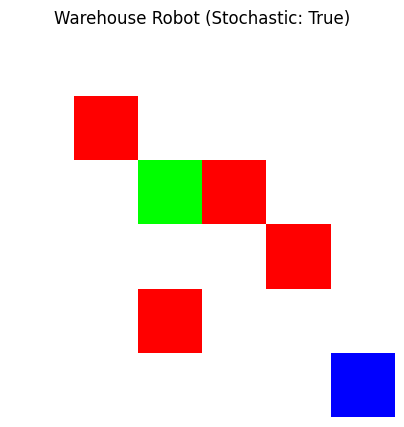

Action: Dropoff, Reward: 100
Task Completed!


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle
import optuna

# Define the WarehouseRobotEnv environment
class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False):
        super().__init__()
        self.grid_size = 6
        self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Up, Down, Left, Right, Pick-up, Drop-off
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        self.pickup_position = [2, 2]
        self.dropoff_position = [5, 5]
        self.pickup_attempted = False
        self.carrying = False
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
        # Handle stochastic movement
        if self.stochastic and random.random() < 0.1:
            print("Stochastic: Staying in place")
            return self._get_observation(), -1, False, False, {}

        new_pos = self.agent_position.copy()
        if action == 0: new_pos[0] -= 1  # Up
        elif action == 1: new_pos[0] += 1  # Down
        elif action == 2: new_pos[1] -= 1  # Left
        elif action == 3: new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if action == 4:  # Pick-up
            if self.agent_position == self.pickup_position and not self.carrying:
                self.carrying = True
                reward = 25
                self.pickup_attempted = True
            elif self.carrying:
                reward = -1

        elif action == 5:  # Drop-off
            if self.agent_position == self.dropoff_position and self.carrying:
                reward = 100
                terminated = True  # Successful termination
            elif self.carrying:
                reward = -25
            self.carrying = False

        # Handle time-based truncation
        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Episode truncation due to time limit

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Set element colors
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]  # Obstacles
        grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]  # Pickup
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]  # Dropoff
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]  # Agent

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

# Q-learning implementation
def q_learning(env, episodes, max_step=100, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all possible states in the grid with both carrying statuses.
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in [0, 1]:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)  # Convert to tuple for hashing
        total_reward = 0
        done = False
        step_count = 0  # Initialize step counter for the current episode
        
        while not done and step_count < max_step:
            # Choose action using an epsilon-greedy strategy
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_table[state])  # Exploit

            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            
            # Initialize next_state in Q-table if it doesn't exist
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Q-learning update
            old_value = q_table[state][action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state][action] = new_value
            
            state = next_state
            total_reward += reward
            step_count += 1  # Increment the step counter
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

# Define the objective function for hyperparameter tuning using Optuna
def objective(trial):
    # Hyperparameter search space for discount factor and epsilon decay rate
    gamma = trial.suggest_float('gamma', 0.90, 0.999)
    epsilon_decay = trial.suggest_float('epsilon_decay', 0.90, 0.999)
    alpha = trial.suggest_float('alpha', 0.1, 0.5)
    
    # Create a new instance of the environment
    env = WarehouseRobotEnv(stochastic=False)
    
    # Set a fixed number of episodes and max steps for training
    episodes = 1000
    max_steps = 5000

    # Train the agent using Q-learning with the sampled hyperparameters
    q_table, rewards, epsilons = q_learning(
        env,
        episodes=episodes,
        max_step=max_steps,
        alpha=alpha,
        gamma=gamma,
        epsilon=1.0,
        epsilon_decay=epsilon_decay,
        epsilon_min=0.01
    )
    
    # Evaluate the learned (greedy) policy over 10 episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    avg_reward = np.mean(greedy_rewards)
    print(f"Trial: gamma={gamma:.3f}, epsilon_decay={epsilon_decay:.3f},  learning_rate={alpha:.3f}, avg_reward={avg_reward:.2f}")
    
    # Since higher average reward indicates a better policy, we maximize this value.
    return avg_reward

if __name__ == "__main__":
    # Run hyperparameter tuning with Optuna
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20)

    print("\nBest hyperparameters found:")
    trial = study.best_trial
    print(f"  Average Reward: {trial.value}")
    for key, value in trial.params.items():
        print(f"  {key}: {value}")

    # Optionally, you can run a final simulation using the best hyperparameters
    best_gamma = trial.params['gamma']
    best_epsilon_decay = trial.params['epsilon_decay']
    best_alpha = trial.params['alpha']
    env = WarehouseRobotEnv(stochastic=True)
    q_table, rewards, epsilons = q_learning(
        env,
        episodes=1000,
        max_step=50,
        alpha=best_alpha,
        gamma=best_gamma,
        epsilon=1.0,
        epsilon_decay=best_epsilon_decay,
        epsilon_min=0.01
    )
    
    # Render one episode with the learned policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with the learned policy:")
    for _ in range(50):  # maximum steps per episode
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        print(f"Action: {['Up','Down','Left','Right','Pickup','Dropoff'][action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state

SARSA

SARSA Episode 0, Reward: -2130, Epsilon: 0.4975
SARSA Episode 100, Reward: 41, Epsilon: 0.3013707921541371
SARSA Episode 200, Reward: 83, Epsilon: 0.18256151630876813
SARSA Episode 300, Reward: 114, Epsilon: 0.11059036942077165
SARSA Episode 400, Reward: 113, Epsilon: 0.06699237635569168
SARSA Episode 500, Reward: 113, Epsilon: 0.04058200106653845
SARSA Episode 600, Reward: 113, Epsilon: 0.024583376499744156
SARSA Episode 700, Reward: 115, Epsilon: 0.014891882712665923
SARSA Episode 800, Reward: 115, Epsilon: 0.01
SARSA Episode 900, Reward: 115, Epsilon: 0.01
SARSA Episode 1000, Reward: 115, Epsilon: 0.01
SARSA Episode 1100, Reward: 115, Epsilon: 0.01
SARSA Episode 1200, Reward: 115, Epsilon: 0.01
SARSA Episode 1300, Reward: 113, Epsilon: 0.01
SARSA Episode 1400, Reward: 115, Epsilon: 0.01
SARSA Episode 1500, Reward: 115, Epsilon: 0.01
SARSA Episode 1600, Reward: 115, Epsilon: 0.01
SARSA Episode 1700, Reward: 115, Epsilon: 0.01
SARSA Episode 1800, Reward: 115, Epsilon: 0.01
SARSA Episo

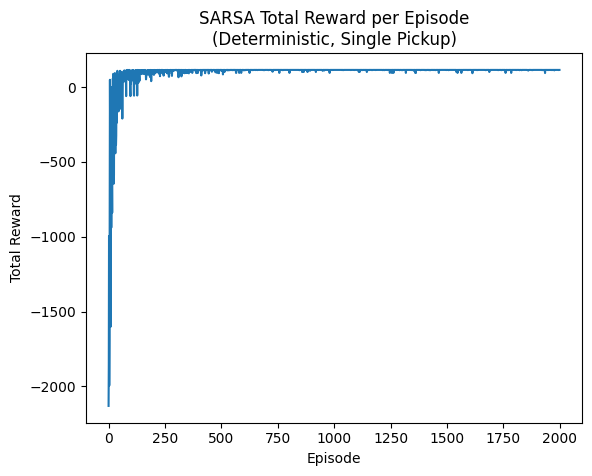

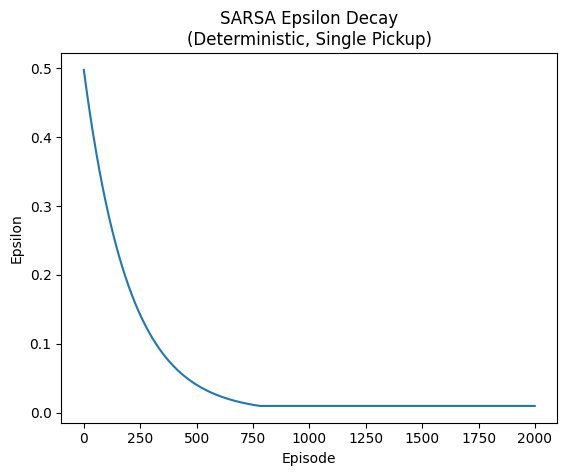

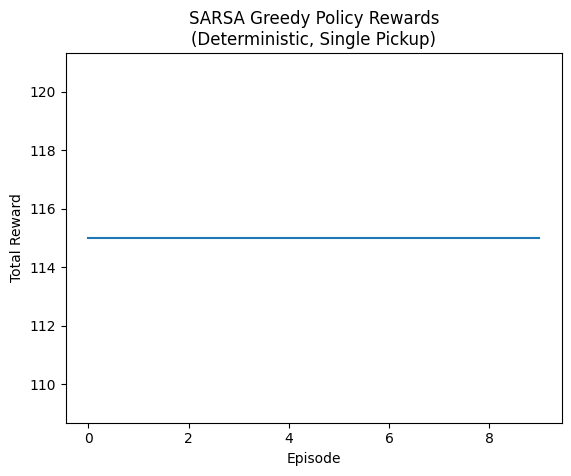


Rendering one episode with the SARSA learned policy:


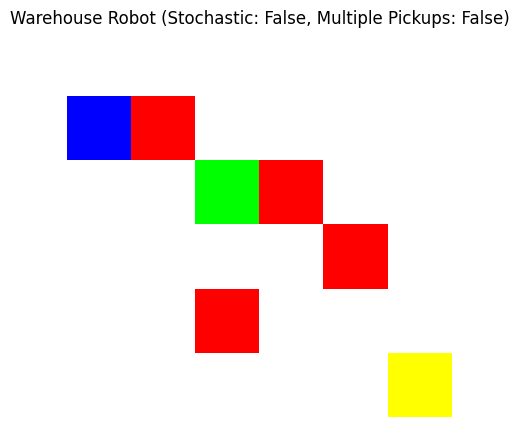

Action: Down, Reward: -1


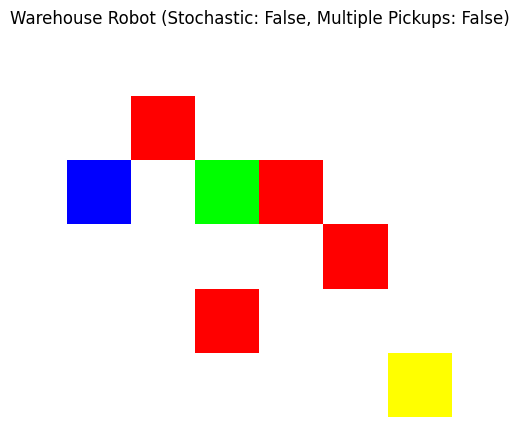

Action: Down, Reward: -1


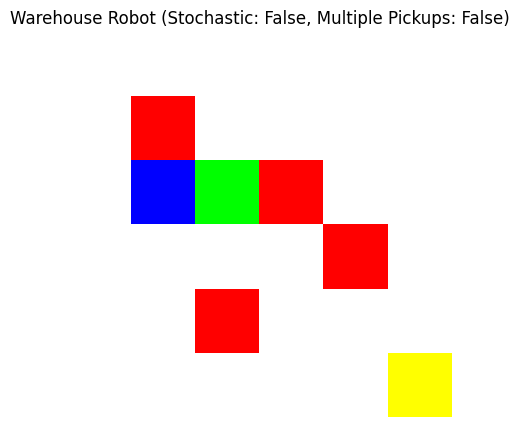

Action: Right, Reward: -1


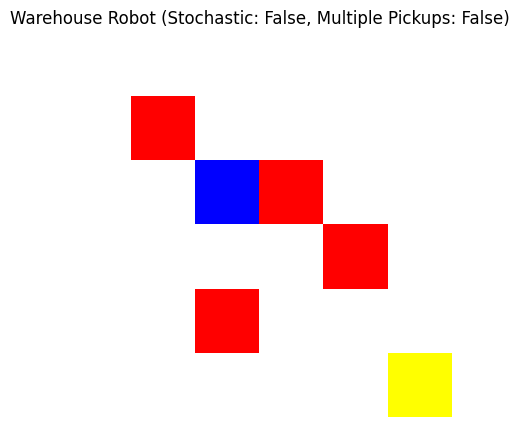

Action: Right, Reward: -1


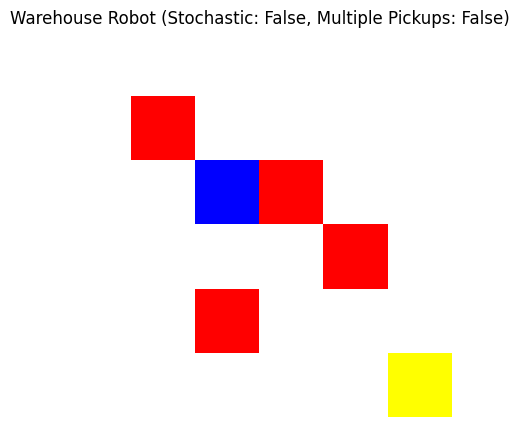

Action: Pickup, Reward: 25


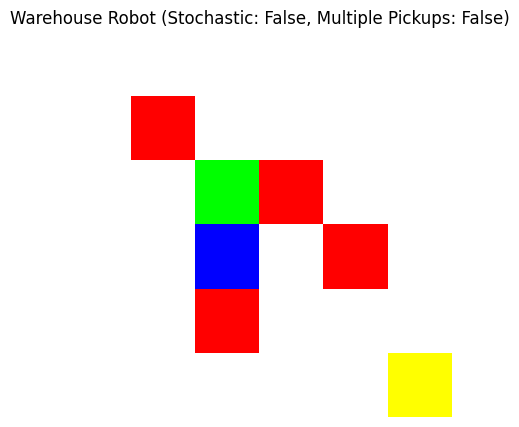

Action: Down, Reward: -1


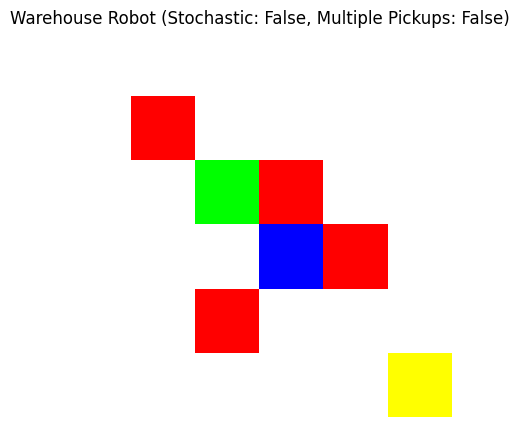

Action: Right, Reward: -1


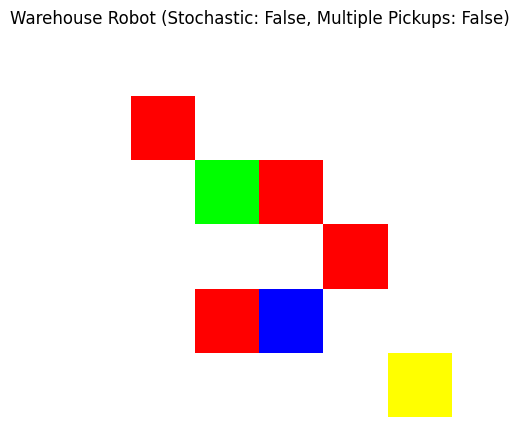

Action: Down, Reward: -1


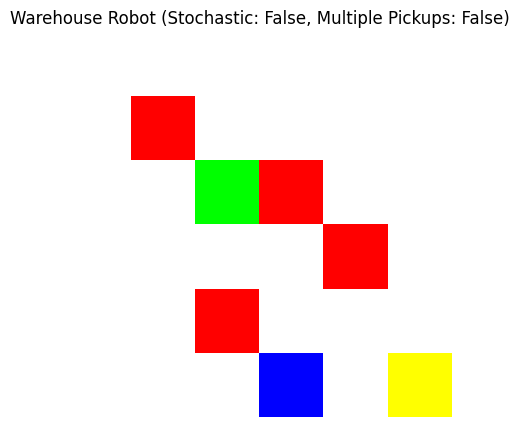

Action: Down, Reward: -1


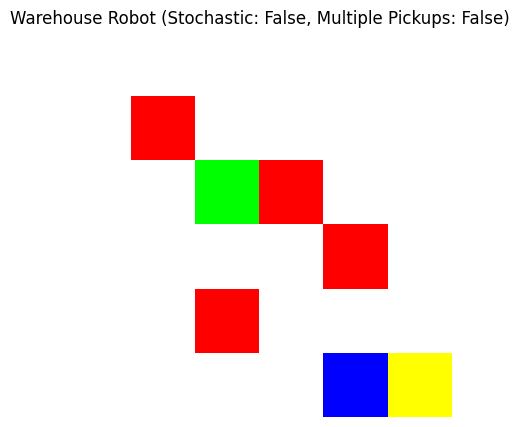

Action: Right, Reward: -1


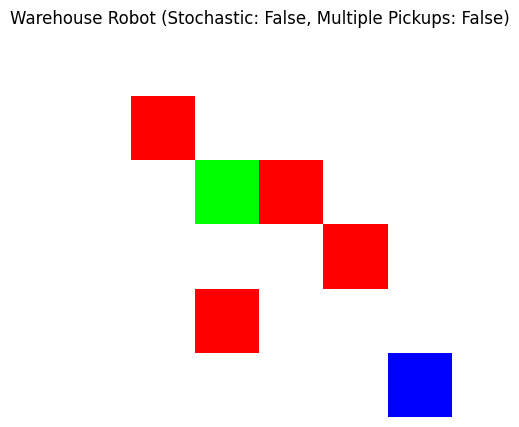

Action: Right, Reward: -1


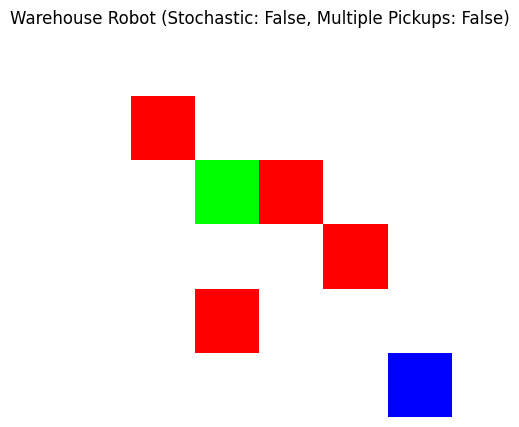

Action: Dropoff, Reward: 100
Task Completed!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle


# ==================== Environment Definition ====================
class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False, multiple_pickups=False):
        super().__init__()
        self.grid_size = 6
        self.multiple_pickups = multiple_pickups
        if self.multiple_pickups:
            # Allow up to 2 packages to be carried (can be extended as needed)
            self.max_carry = 2
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, self.max_carry + 1])
        else:
            # Single package: carrying is Boolean (0 or 1)
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Actions: Up, Down, Left, Right, Pickup, Dropoff
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        if self.multiple_pickups:
            # Define multiple pickup locations
            self.pickup_positions = [[2, 2], [0, 5]]
            self.carrying = 0  # Number of packages carried
        else:
            self.pickup_position = [2, 2]
            self.carrying = False  # Single pickup: carried or not (Boolean)
        self.dropoff_position = [5, 5]
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        if self.multiple_pickups:
            return (self.agent_position[0], self.agent_position[1], self.carrying)
        else:
            return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
        # Handle stochastic movement: if stochastic, with 90% probability override intended action with a random direction
        if self.stochastic and random.random() < 0.1:
            print("Stochastic: Staying in place")
            return self._get_observation(), -1, False, False, {}

        new_pos = self.agent_position.copy()
        if action == 0:
            new_pos[0] -= 1  # Up
        elif action == 1:
            new_pos[0] += 1  # Down
        elif action == 2:
            new_pos[1] -= 1  # Left
        elif action == 3:
            new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if self.multiple_pickups:
            # For multiple pickups, allow carrying up to max_carry packages
            if action == 4:  # Pickup
                if self.agent_position in self.pickup_positions:
                    if self.carrying < self.max_carry:
                        self.carrying += 1
                        reward = 25
                    else:
                        reward = -1  # Already at capacity
                else:
                    reward = -1  # Not at any pickup location
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position:
                    if self.carrying > 0:
                        self.carrying -= 1
                        reward = 100
                    else:
                        reward = -1  # Nothing to drop
        else:
            # Single pickup scenario
            if action == 4:  # Pickup
                if self.agent_position == self.pickup_position and not self.carrying:
                    self.carrying = True
                    reward = 25
                elif self.carrying:
                    reward = -1
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position and self.carrying:
                    reward = 100
                    terminated = True  # Terminate episode after successful drop-off
                elif self.carrying:
                    reward = -25
                self.carrying = False

        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Episode termination due to time limit

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Draw obstacles in red
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]
        # Draw pickup locations in green
        if self.multiple_pickups:
            for p in self.pickup_positions:
                grid[p[0], p[1]] = [0, 1, 0]
        else:
            grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]
        # Draw dropoff location in yellow
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]
        # Draw agent in blue
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic}, Multiple Pickups: {self.multiple_pickups})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

# ==================== SARSA Algorithm ====================
# Best hyperparameters: {'alpha': 0.1, 'gamma': 0.99, 'epsilon': 0.5} with average reward: 112.06666666666666
def sarsa(env, episodes, max_step=1000, alpha=0.1, gamma=0.99, 
          epsilon=0.5, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all possible states
    if env.multiple_pickups:
        carry_range = range(env.max_carry + 1)
    else:
        carry_range = [0, 1]
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in carry_range:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)  # Convert to tuple for hashing
        total_reward = 0
        done = False
        step_count = 0

        # Choose initial action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        while not done and step_count < max_step:
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)

            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Choose next action using epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state])
            
            # SARSA update rule:
            old_value = q_table[state][action]
            q_table[state][action] = old_value + alpha * (reward + gamma * q_table[next_state][next_action] - old_value)
            
            state = next_state
            action = next_action
            total_reward += reward
            step_count += 1
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"SARSA Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

# ==================== Simulation Function ====================
def run_simulation_with_sarsa(stochastic=False, multiple_pickups=False):
    env = WarehouseRobotEnv(stochastic, multiple_pickups)
    episodes = 2000
    q_table, rewards, epsilons = sarsa(env, episodes)
    
    # Save Q-table
    filename = f'sarsa_q_table_{"stochastic" if stochastic else "deterministic"}'
    if multiple_pickups:
        filename += "_multiple_pickups"
    with open(f'{filename}.pkl', 'wb') as file:
        pickle.dump(q_table, file)
    
    # Display sample Q-table entries
    print(f"\nSARSA Q-table sample for {'Stochastic' if stochastic else 'Deterministic'} Environment with " +
          ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ":")
    print("Sample (first entries):", list(q_table.items())[:5])
    print("Sample (last entries):", list(q_table.items())[-5:])

    # Plot total reward per episode
    plt.figure()
    plt.plot(rewards)
    plt.title(f"SARSA Total Reward per Episode\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Plot epsilon decay
    plt.figure()
    plt.plot(epsilons)
    plt.title(f"SARSA Epsilon Decay\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.savefig(f"sarsa_epsilon_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Test the learned policy with 10 greedy episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    plt.figure()
    plt.plot(greedy_rewards)
    plt.title(f"SARSA Greedy Policy Rewards\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_greedy_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Render one episode using the learned greedy policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with the SARSA learned policy:")
    for _ in range(50):  # Maximum steps to render
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        actions_map = ['Up', 'Down', 'Left', 'Right', 'Pickup', 'Dropoff']
        print(f"Action: {actions_map[action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state

# ==================== Main ====================
if __name__ == "__main__":
    # Run SARSA on deterministic environment (single pickup)
    run_simulation_with_sarsa(stochastic=False, multiple_pickups=True)
   


SARSA Stochastic Env

Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: St

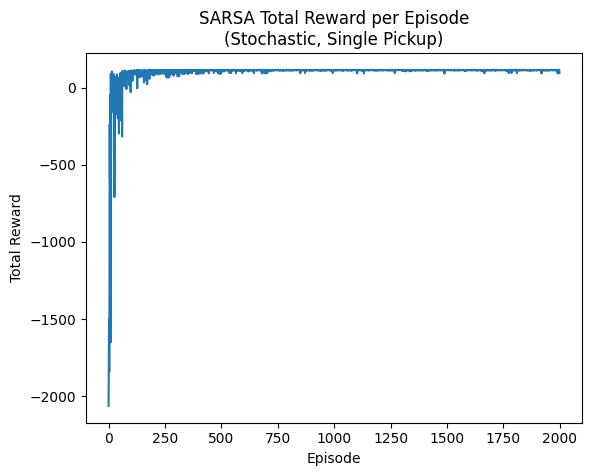

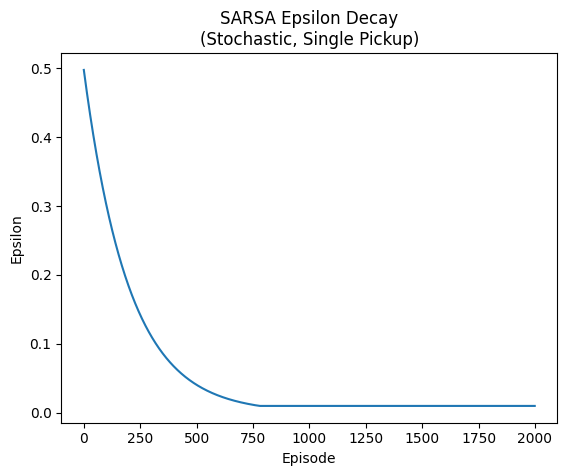

Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place
Stochastic: Staying in place


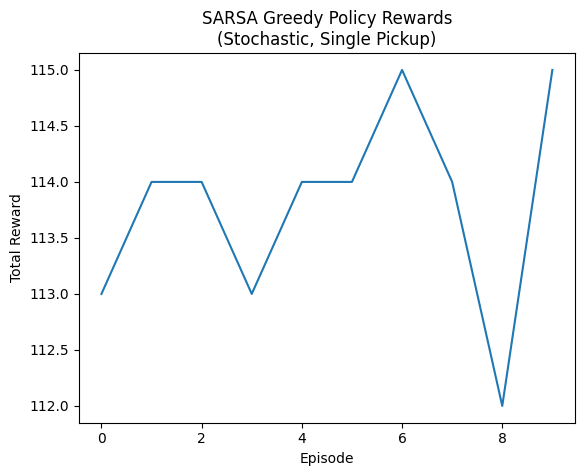


Rendering one episode with the SARSA learned policy:


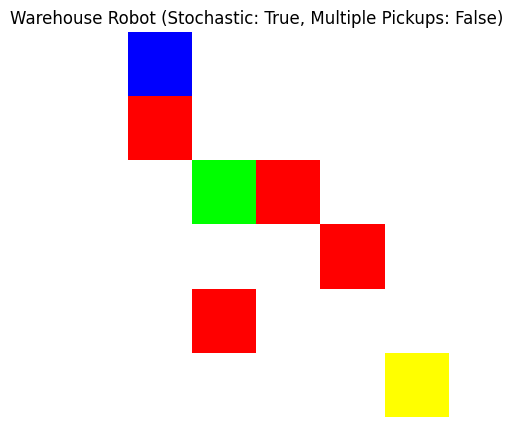

Action: Right, Reward: -1


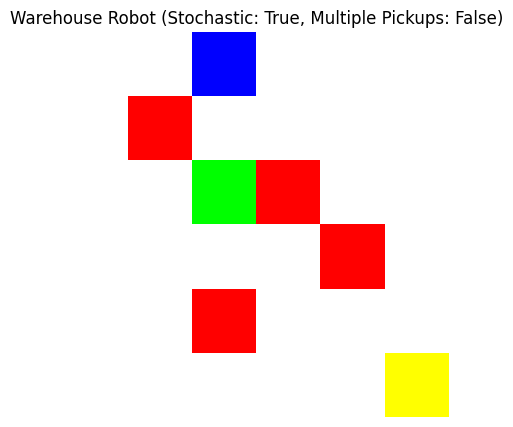

Action: Right, Reward: -1


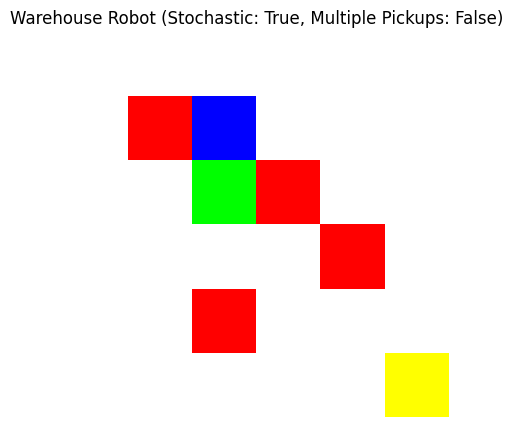

Action: Down, Reward: -1


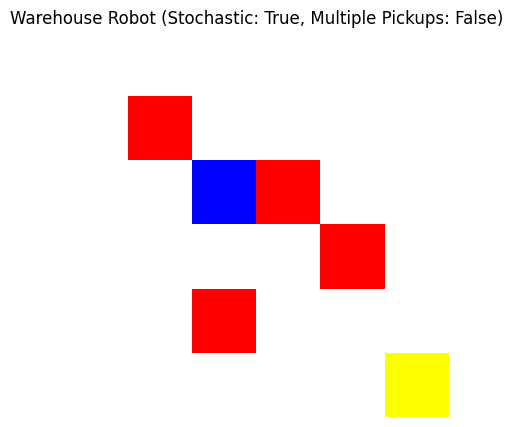

Action: Down, Reward: -1
Stochastic: Staying in place


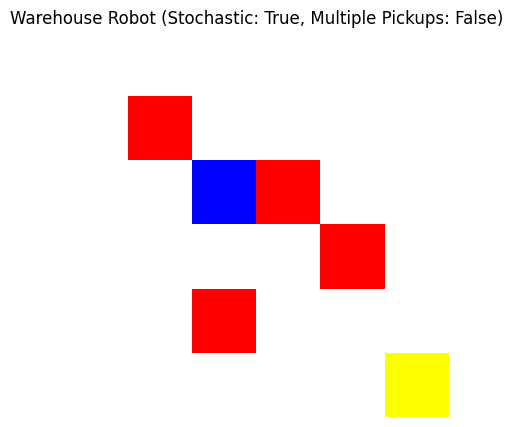

Action: Pickup, Reward: -1
Stochastic: Staying in place


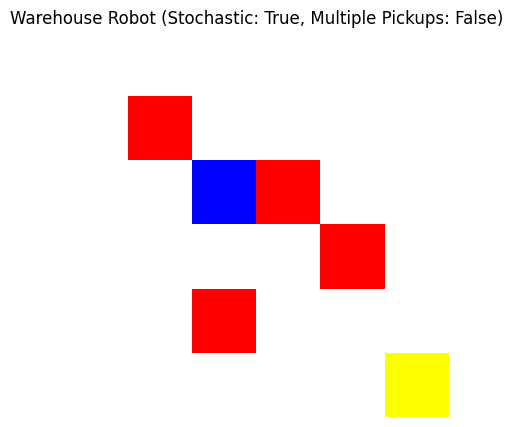

Action: Pickup, Reward: -1
Stochastic: Staying in place


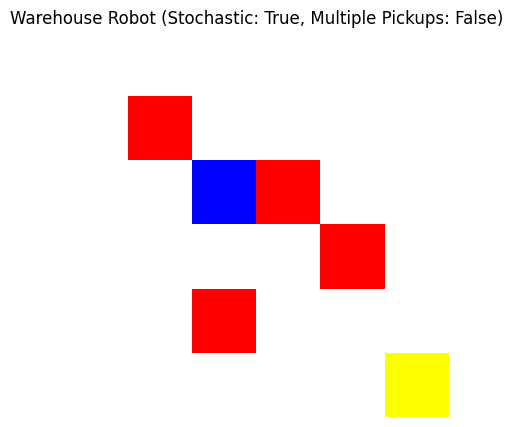

Action: Pickup, Reward: -1


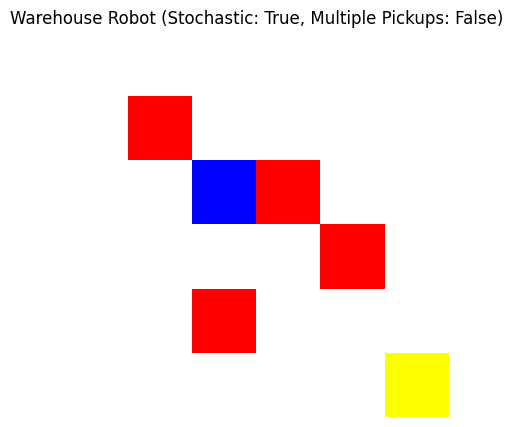

Action: Pickup, Reward: 25


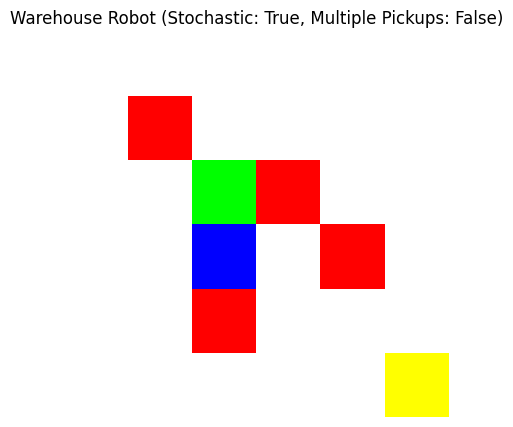

Action: Down, Reward: -1


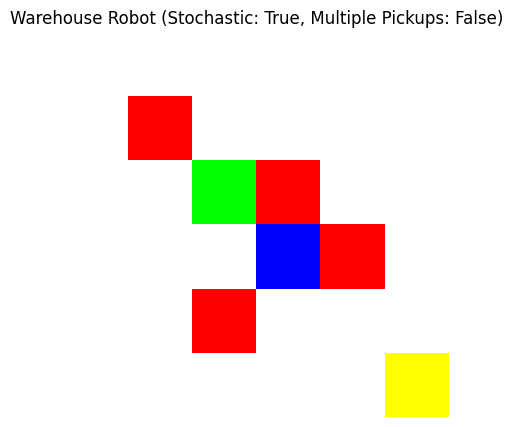

Action: Right, Reward: -1


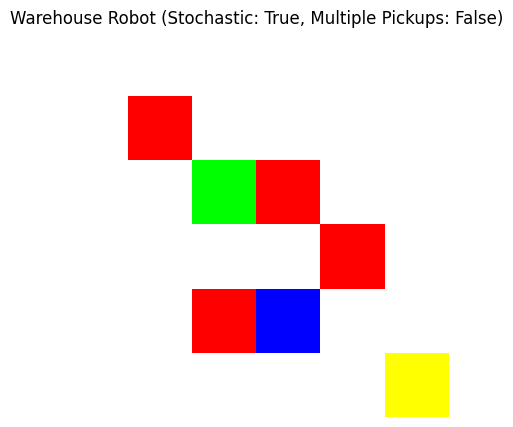

Action: Down, Reward: -1


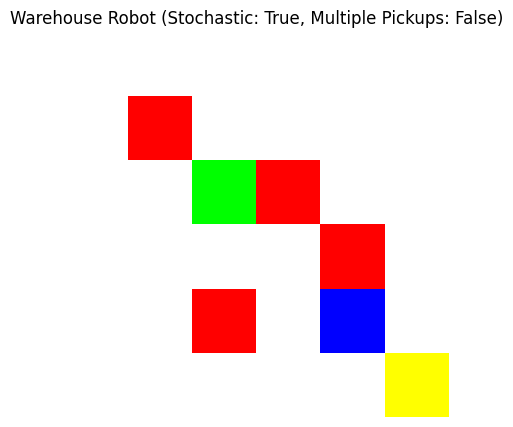

Action: Right, Reward: -1


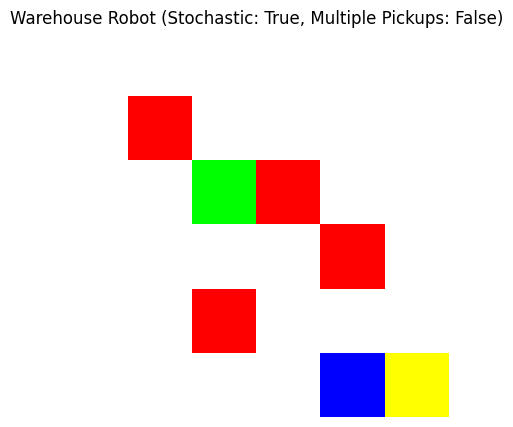

Action: Down, Reward: -1


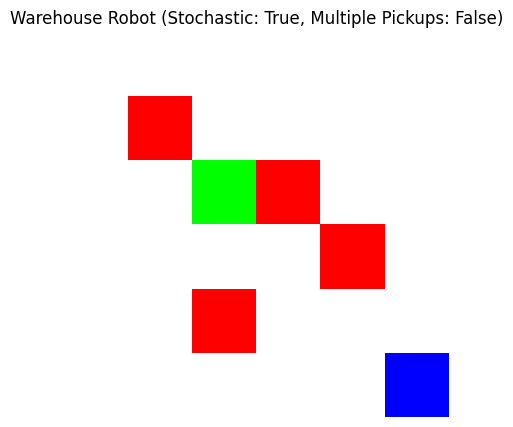

Action: Right, Reward: -1


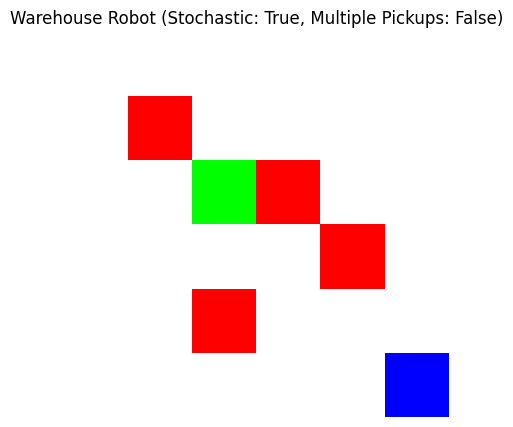

Action: Dropoff, Reward: 100
Task Completed!


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle


# ==================== Environment Definition ====================
class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False, multiple_pickups=False):
        super().__init__()
        self.grid_size = 6
        self.multiple_pickups = multiple_pickups
        if self.multiple_pickups:
            # Allow up to 2 packages to be carried (can be extended as needed)
            self.max_carry = 2  
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, self.max_carry + 1])
        else:
            # Single package: carrying is Boolean (0 or 1)
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Actions: Up, Down, Left, Right, Pickup, Dropoff
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        if self.multiple_pickups:
            # Define multiple pickup locations
            self.pickup_positions = [[2, 2], [0, 5]]
            self.carrying = 0  # Number of packages carried
        else:
            self.pickup_position = [2, 2]
            self.carrying = False  # Single pickup: carried or not (Boolean)
        self.dropoff_position = [5, 5]
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        if self.multiple_pickups:
            return (self.agent_position[0], self.agent_position[1], self.carrying)
        else:
            return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
        # Handle stochastic movement: if stochastic, with 90% probability override intended action with a random direction
        if self.stochastic and random.random() < 0.1:
            print("Stochastic: Staying in place")
            return self._get_observation(), -1, False, False, {}

        new_pos = self.agent_position.copy()
        if action == 0:
            new_pos[0] -= 1  # Up
        elif action == 1:
            new_pos[0] += 1  # Down
        elif action == 2:
            new_pos[1] -= 1  # Left
        elif action == 3:
            new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if self.multiple_pickups:
            # For multiple pickups, allow carrying up to max_carry packages
            if action == 4:  # Pickup
                if self.agent_position in self.pickup_positions:
                    if self.carrying < self.max_carry:
                        self.carrying += 1
                        reward = 25
                    else:
                        reward = -1  # Already at capacity
                else:
                    reward = -1  # Not at any pickup location
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position:
                    if self.carrying > 0:
                        self.carrying -= 1
                        reward = 100
                    else:
                        reward = -1  # Nothing to drop
        else:
            # Single pickup scenario
            if action == 4:  # Pickup
                if self.agent_position == self.pickup_position and not self.carrying:
                    self.carrying = True
                    reward = 25
                elif self.carrying:
                    reward = -1
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position and self.carrying:
                    reward = 100
                    terminated = True  # Terminate episode after successful drop-off
                elif self.carrying:
                    reward = -25
                self.carrying = False

        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Episode termination due to time limit

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Draw obstacles in red
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]
        # Draw pickup locations in green
        if self.multiple_pickups:
            for p in self.pickup_positions:
                grid[p[0], p[1]] = [0, 1, 0]
        else:
            grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]
        # Draw dropoff location in yellow
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]
        # Draw agent in blue
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic}, Multiple Pickups: {self.multiple_pickups})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

# ==================== SARSA Algorithm ====================
# Best hyperparameters: {'alpha': 0.1, 'gamma': 0.99, 'epsilon': 0.5} with average reward: 112.06666666666666
def sarsa(env, episodes, max_step=1000, alpha=0.1, gamma=0.99, 
          epsilon=0.5, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all possible states
    if env.multiple_pickups:
        carry_range = range(env.max_carry + 1)
    else:
        carry_range = [0, 1]
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in carry_range:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)  # Convert to tuple for hashing
        total_reward = 0
        done = False
        step_count = 0

        # Choose initial action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        while not done and step_count < max_step:
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)

            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Choose next action using epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state])
            
            # SARSA update rule:
            old_value = q_table[state][action]
            q_table[state][action] = old_value + alpha * (reward + gamma * q_table[next_state][next_action] - old_value)
            
            state = next_state
            action = next_action
            total_reward += reward
            step_count += 1
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"SARSA Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

# ==================== Simulation Function ====================
def run_simulation_with_sarsa(stochastic=False, multiple_pickups=False):
    env = WarehouseRobotEnv(stochastic, multiple_pickups)
    episodes = 2000
    q_table, rewards, epsilons = sarsa(env, episodes)
    
    # Save Q-table
    filename = f'sarsa_q_table_{"stochastic" if stochastic else "deterministic"}'
    if multiple_pickups:
        filename += "_multiple_pickups"
    with open(f'{filename}.pkl', 'wb') as file:
        pickle.dump(q_table, file)
    
    # Display sample Q-table entries
    print(f"\nSARSA Q-table sample for {'Stochastic' if stochastic else 'Deterministic'} Environment with " +
          ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ":")
    print("Sample (first entries):", list(q_table.items())[:5])
    print("Sample (last entries):", list(q_table.items())[-5:])

    # Plot total reward per episode
    plt.figure()
    plt.plot(rewards)
    plt.title(f"SARSA Total Reward per Episode\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Plot epsilon decay
    plt.figure()
    plt.plot(epsilons)
    plt.title(f"SARSA Epsilon Decay\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.savefig(f"sarsa_epsilon_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Test the learned policy with 10 greedy episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    plt.figure()
    plt.plot(greedy_rewards)
    plt.title(f"SARSA Greedy Policy Rewards\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_greedy_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Render one episode using the learned greedy policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with the SARSA learned policy:")
    for _ in range(50):  # Maximum steps to render
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        actions_map = ['Up', 'Down', 'Left', 'Right', 'Pickup', 'Dropoff']
        print(f"Action: {actions_map[action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state

# ==================== Main ====================
if __name__ == "__main__":
    # Run SARSA on deterministic environment (single pickup)
    run_simulation_with_sarsa(stochastic=True, multiple_pickups=False)

Hyperparameter tuning for SARSA Determinstic Env

SARSA Episode 0, Reward: -2795, Epsilon: 0.995
SARSA Episode 100, Reward: -744, Epsilon: 0.6027415843082742
SARSA Episode 200, Reward: 105, Epsilon: 0.36512303261753626
SARSA Episode 300, Reward: 111, Epsilon: 0.2211807388415433
SARSA Episode 400, Reward: 106, Epsilon: 0.13398475271138335
SARSA Episode 500, Reward: 111, Epsilon: 0.0811640021330769
SARSA Episode 600, Reward: 113, Epsilon: 0.04916675299948831
SARSA Episode 700, Reward: 113, Epsilon: 0.029783765425331846
SARSA Episode 800, Reward: 103, Epsilon: 0.018042124582040707
SARSA Episode 900, Reward: 113, Epsilon: 0.010929385683282892
SARSA Episode 1000, Reward: 113, Epsilon: 0.01
SARSA Episode 1100, Reward: 113, Epsilon: 0.01
SARSA Episode 1200, Reward: 93, Epsilon: 0.01
SARSA Episode 1300, Reward: 113, Epsilon: 0.01
SARSA Episode 1400, Reward: 113, Epsilon: 0.01
SARSA Episode 1500, Reward: 113, Epsilon: 0.01
SARSA Episode 1600, Reward: 113, Epsilon: 0.01
SARSA Episode 1700, Reward: 112, Epsilon: 0.01
SARSA Episode 1800, Reward: 

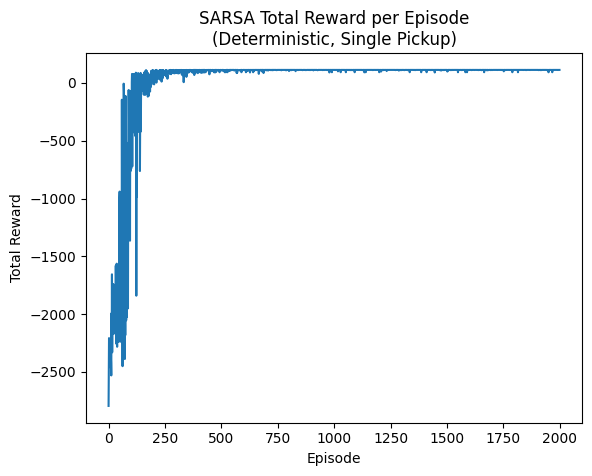

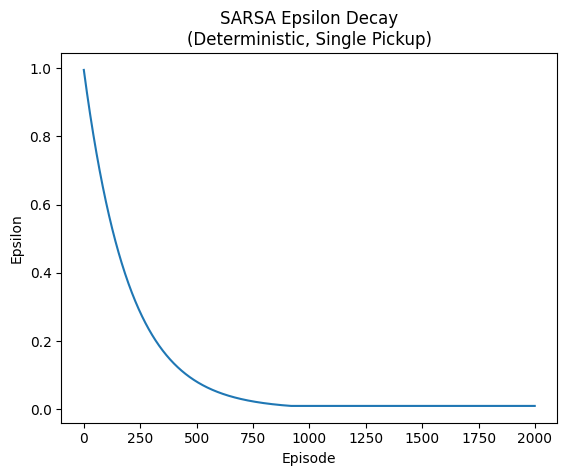

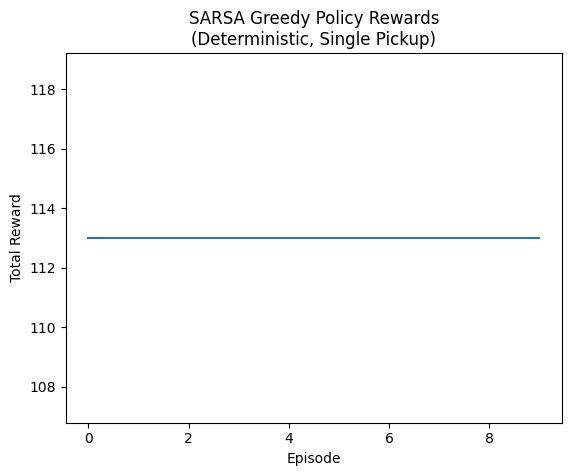


Rendering one episode with the SARSA learned policy:


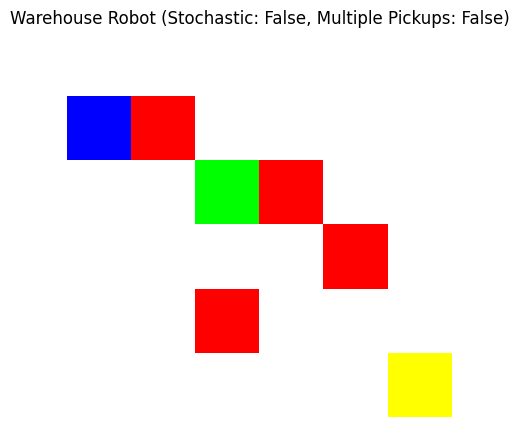

Action: Down, Reward: -1


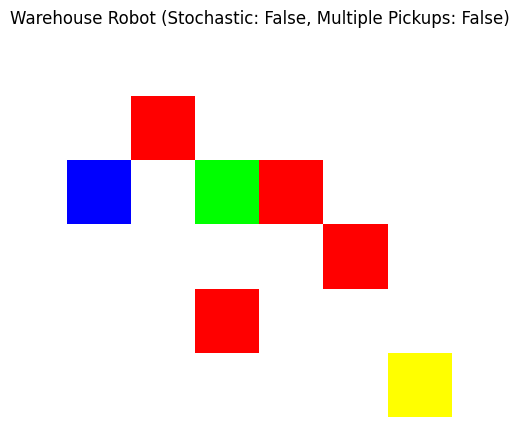

Action: Down, Reward: -1


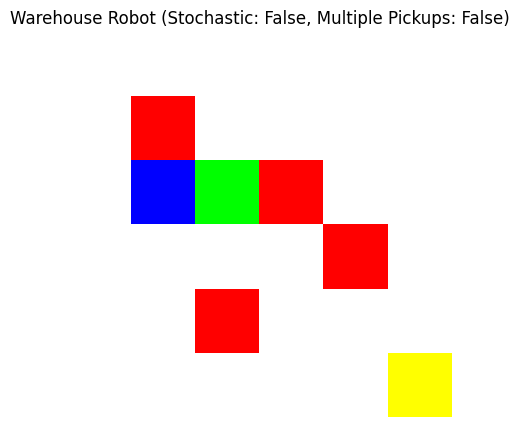

Action: Right, Reward: -1


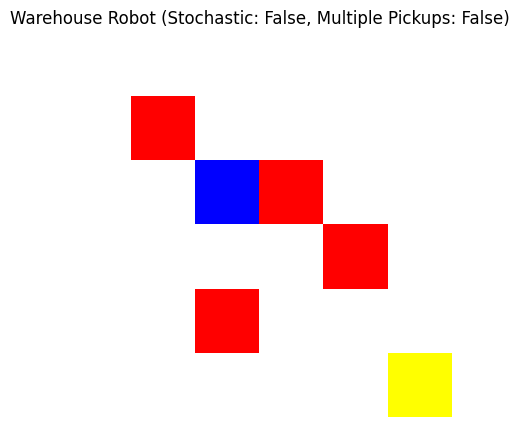

Action: Right, Reward: -1


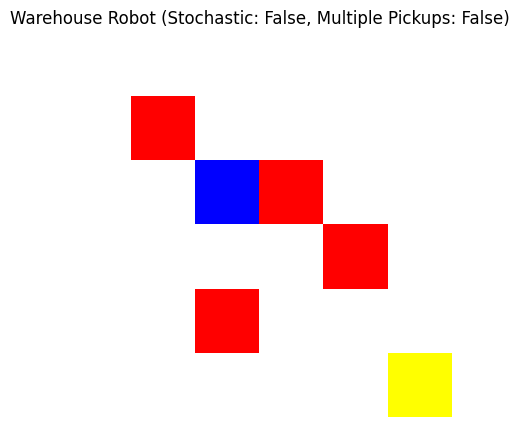

Action: Pickup, Reward: 25


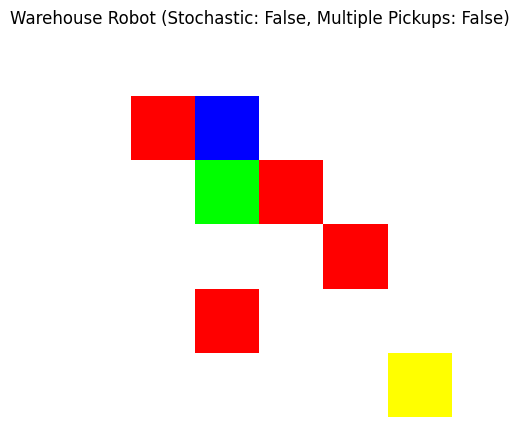

Action: Up, Reward: -1


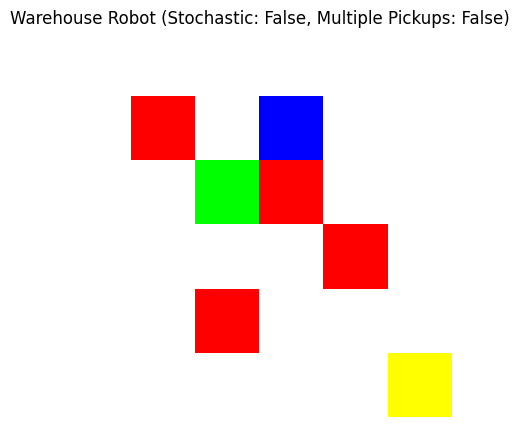

Action: Right, Reward: -1


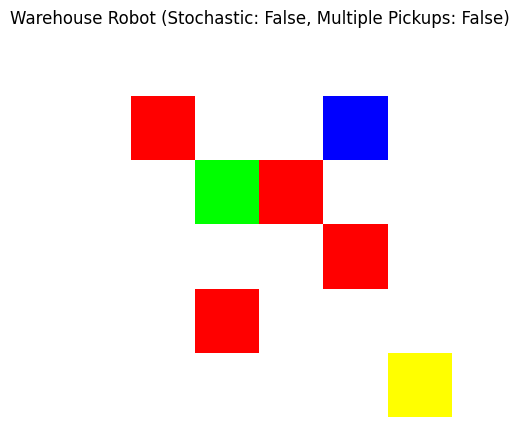

Action: Right, Reward: -1


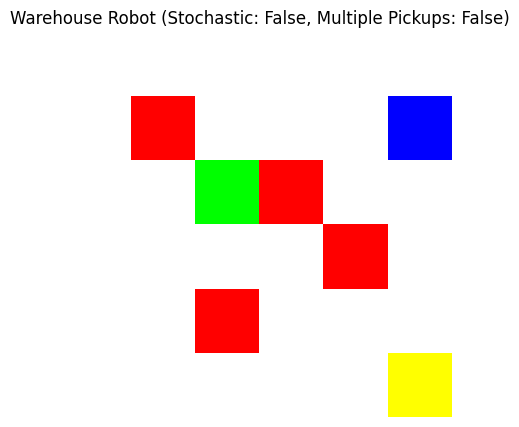

Action: Right, Reward: -1


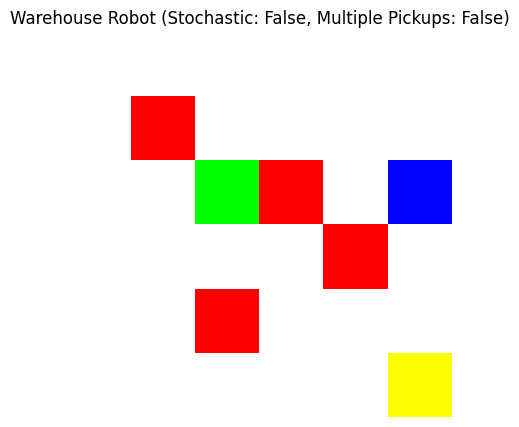

Action: Down, Reward: -1


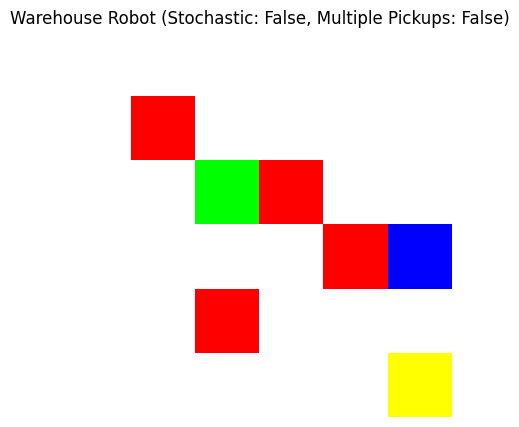

Action: Down, Reward: -1


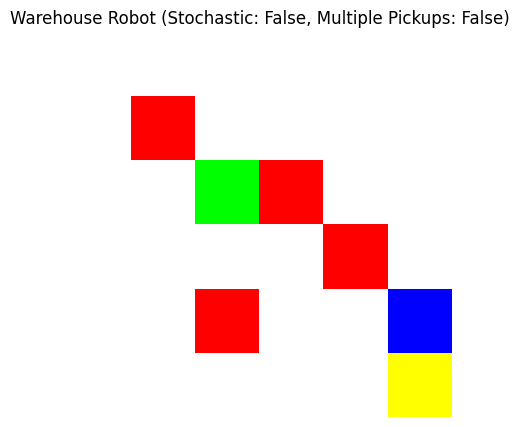

Action: Down, Reward: -1


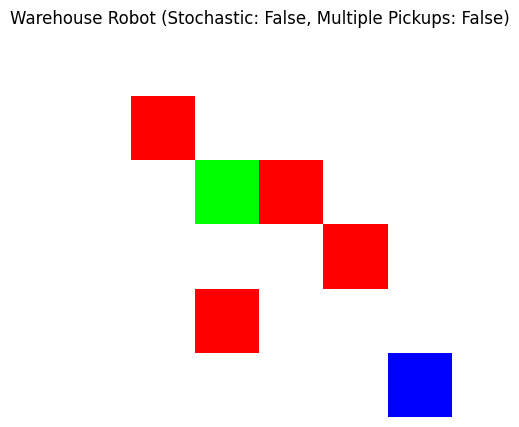

Action: Down, Reward: -1


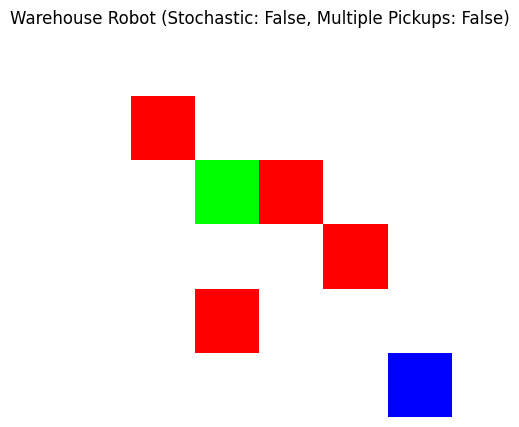

Action: Dropoff, Reward: 100
Task Completed!
SARSA Episode 0, Reward: -404, Epsilon: 0.995
SARSA Episode 100, Reward: -233, Epsilon: 0.6027415843082742
SARSA Episode 200, Reward: 84, Epsilon: 0.36512303261753626
SARSA Episode 300, Reward: 111, Epsilon: 0.2211807388415433
SARSA Episode 400, Reward: 115, Epsilon: 0.13398475271138335
SARSA Episode 0, Reward: -309, Epsilon: 0.995
SARSA Episode 100, Reward: -151, Epsilon: 0.6027415843082742
SARSA Episode 200, Reward: 77, Epsilon: 0.36512303261753626
SARSA Episode 300, Reward: 108, Epsilon: 0.2211807388415433
SARSA Episode 400, Reward: 108, Epsilon: 0.13398475271138335
SARSA Episode 0, Reward: -290, Epsilon: 0.995
SARSA Episode 100, Reward: -166, Epsilon: 0.6027415843082742
SARSA Episode 200, Reward: -56, Epsilon: 0.36512303261753626
SARSA Episode 300, Reward: 100, Epsilon: 0.2211807388415433
SARSA Episode 400, Reward: 91, Epsilon: 0.13398475271138335
SARSA Episode 0, Reward: -157, Epsilon: 0.995
SARSA Episode 100, Reward: -203, Epsilon: 0.6

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle

# ==================== Environment Definition ====================
class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False, multiple_pickups=False):
        super().__init__()
        self.grid_size = 6
        self.multiple_pickups = multiple_pickups
        if self.multiple_pickups:
            # Allow up to 2 packages to be carried
            self.max_carry = 2  
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, self.max_carry + 1])
        else:
            # Single package: carrying is Boolean (0 or 1)
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Actions: Up, Down, Left, Right, Pickup, Dropoff
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        if self.multiple_pickups:
            # Define multiple pickup locations
            self.pickup_positions = [[2, 2], [0, 5]]
            self.carrying = 0  # Number of packages carried
        else:
            self.pickup_position = [2, 2]
            self.carrying = False  # Single pickup: carried or not (Boolean)
        self.dropoff_position = [5, 5]
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        if self.multiple_pickups:
            return (self.agent_position[0], self.agent_position[1], self.carrying)
        else:
            return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
        # For stochastic environments: with 90% chance override intended direction with a random one
        if self.stochastic and random.random() < 0.9:
            action = random.choice([0, 1, 2, 3])

        new_pos = self.agent_position.copy()
        if action == 0:
            new_pos[0] -= 1  # Up
        elif action == 1:
            new_pos[0] += 1  # Down
        elif action == 2:
            new_pos[1] -= 1  # Left
        elif action == 3:
            new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if self.multiple_pickups:
            if action == 4:  # Pickup
                if self.agent_position in self.pickup_positions:
                    if self.carrying < self.max_carry:
                        self.carrying += 1
                        reward = 25
                    else:
                        reward = -1  # Already at capacity
                else:
                    reward = -1  # Not at any pickup location
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position:
                    if self.carrying > 0:
                        self.carrying -= 1
                        reward = 100
                    else:
                        reward = -1  # Nothing to drop
        else:
            if action == 4:  # Pickup
                if self.agent_position == self.pickup_position and not self.carrying:
                    self.carrying = True
                    reward = 25
                elif self.carrying:
                    reward = -1
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position and self.carrying:
                    reward = 100
                    terminated = True  # End episode after successful dropoff
                elif self.carrying:
                    reward = -25
                self.carrying = False

        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Time limit reached

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Draw obstacles (red)
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]
        # Draw pickup locations (green)
        if self.multiple_pickups:
            for p in self.pickup_positions:
                grid[p[0], p[1]] = [0, 1, 0]
        else:
            grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]
        # Draw dropoff location (yellow)
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]
        # Draw the agent (blue)
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic}, Multiple Pickups: {self.multiple_pickups})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

# ==================== SARSA Algorithm ====================
def sarsa(env, episodes, max_step=1000, alpha=0.1, gamma=0.99, 
          epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all states (x, y, carrying)
    if env.multiple_pickups:
        carry_range = range(env.max_carry + 1)
    else:
        carry_range = [0, 1]
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in carry_range:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)
        total_reward = 0
        done = False
        step_count = 0

        # Choose initial action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        while not done and step_count < max_step:
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Choose next action using epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state])
            
            # SARSA update rule
            old_value = q_table[state][action]
            q_table[state][action] = old_value + alpha * (reward + gamma * q_table[next_state][next_action] - old_value)
            
            state = next_state
            action = next_action
            total_reward += reward
            step_count += 1
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"SARSA Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

# ==================== Simulation Function ====================
def run_simulation_with_sarsa(stochastic=False, multiple_pickups=False):
    env = WarehouseRobotEnv(stochastic, multiple_pickups)
    episodes = 2000
    q_table, rewards, epsilons = sarsa(env, episodes)
    
    # Save Q-table
    filename = f'sarsa_q_table_{"stochastic" if stochastic else "deterministic"}'
    if multiple_pickups:
        filename += "_multiple_pickups"
    with open(f'{filename}.pkl', 'wb') as file:
        pickle.dump(q_table, file)
    
    # Print sample Q-table entries
    print(f"\nSARSA Q-table sample for {'Stochastic' if stochastic else 'Deterministic'} Environment with " +
          ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ":")
    print("Sample (first entries):", list(q_table.items())[:5])
    print("Sample (last entries):", list(q_table.items())[-5:])

    # Plot total reward per episode
    plt.figure()
    plt.plot(rewards)
    plt.title(f"SARSA Total Reward per Episode\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Plot epsilon decay
    plt.figure()
    plt.plot(epsilons)
    plt.title(f"SARSA Epsilon Decay\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.savefig(f"sarsa_epsilon_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Test learned policy with 10 greedy episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    plt.figure()
    plt.plot(greedy_rewards)
    plt.title(f"SARSA Greedy Policy Rewards\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_greedy_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Render one episode using the learned greedy policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with the SARSA learned policy:")
    for _ in range(50):  # Maximum steps to render
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        actions_map = ['Up', 'Down', 'Left', 'Right', 'Pickup', 'Dropoff']
        print(f"Action: {actions_map[action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state

# ==================== Hyperparameter Tuning ====================
def tune_sarsa(env, episodes, max_step, param_grid, n_trials=3):
    best_params = None
    best_score = -np.inf
    results = []
    for alpha in param_grid['alpha']:
        for gamma in param_grid['gamma']:
            for epsilon in param_grid['epsilon']:
                trial_scores = []
                for trial in range(n_trials):
                    # Run SARSA with the current set of hyperparameters
                    q_table, rewards, _ = sarsa(
                        env,
                        episodes,
                        max_step=max_step,
                        alpha=alpha,
                        gamma=gamma,
                        epsilon=epsilon
                    )
                    # Use average reward over the last 100 episodes as the performance metric
                    avg_reward = np.mean(rewards[-100:]) if len(rewards) >= 100 else np.mean(rewards)
                    trial_scores.append(avg_reward)
                avg_trial_score = np.mean(trial_scores)
                results.append({'alpha': alpha, 'gamma': gamma, 'epsilon': epsilon, 'score': avg_trial_score})
                print(f"alpha: {alpha}, gamma: {gamma}, epsilon: {epsilon}, score: {avg_trial_score}")
                if avg_trial_score > best_score:
                    best_score = avg_trial_score
                    best_params = {'alpha': alpha, 'gamma': gamma, 'epsilon': epsilon}
    print("\nBest hyperparameters:", best_params, "with average reward:", best_score)
    return best_params, results

# ==================== Main ====================
if __name__ == "__main__":
    # Run SARSA simulation (deterministic environment, single pickup)
    run_simulation_with_sarsa(stochastic=False, multiple_pickups=False)
    
    # For hyperparameter tuning, create an instance of the environment.
    env = WarehouseRobotEnv(stochastic=False, multiple_pickups=False)
    
    # Define a grid for alpha, gamma, and epsilon
    param_grid = {
        'alpha': [0.1, 0.5, 0.9],
        'gamma': [0.95, 0.99],
        'epsilon': [1.0, 0.5]
    }
    
    # Run hyperparameter tuning using SARSA on a reduced number of episodes (for demonstration)
    best_params, results = tune_sarsa(env, episodes=500, max_step=100, param_grid=param_grid, n_trials=10)


SARSA Episode 0, Reward: -3618, Epsilon: 0.995
SARSA Episode 100, Reward: -3278, Epsilon: 0.6027415843082742
SARSA Episode 200, Reward: -3005, Epsilon: 0.36512303261753626
SARSA Episode 300, Reward: -3411, Epsilon: 0.2211807388415433
SARSA Episode 400, Reward: -3005, Epsilon: 0.13398475271138335
SARSA Episode 500, Reward: -3183, Epsilon: 0.0811640021330769
SARSA Episode 600, Reward: -2948, Epsilon: 0.04916675299948831
SARSA Episode 700, Reward: -3257, Epsilon: 0.029783765425331846
SARSA Episode 800, Reward: -1087, Epsilon: 0.018042124582040707
SARSA Episode 900, Reward: -795, Epsilon: 0.010929385683282892
SARSA Episode 1000, Reward: -2746, Epsilon: 0.01
SARSA Episode 1100, Reward: -1952, Epsilon: 0.01
SARSA Episode 1200, Reward: -2798, Epsilon: 0.01
SARSA Episode 1300, Reward: -1088, Epsilon: 0.01
SARSA Episode 1400, Reward: -3273, Epsilon: 0.01
SARSA Episode 1500, Reward: -1114, Epsilon: 0.01
SARSA Episode 1600, Reward: -3337, Epsilon: 0.01
SARSA Episode 1700, Reward: -2649, Epsilon: 

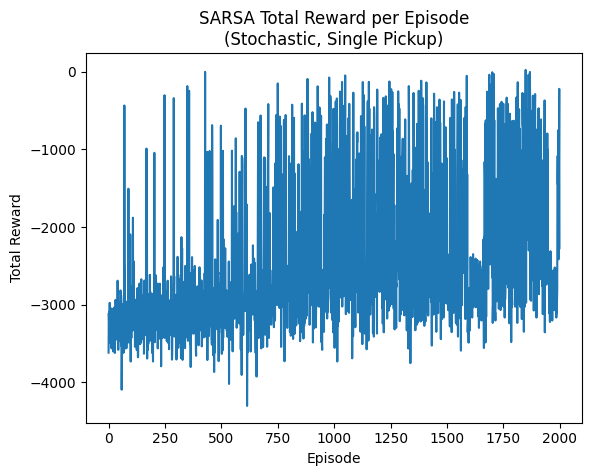

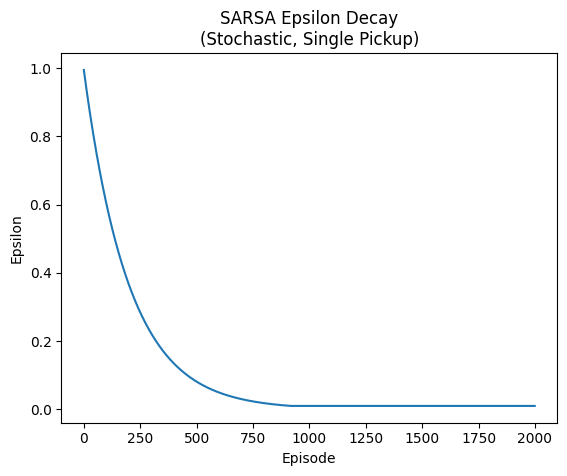

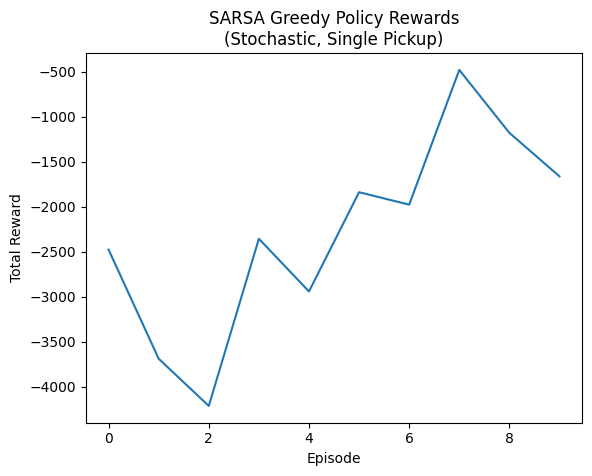


Rendering one episode with the SARSA learned policy:


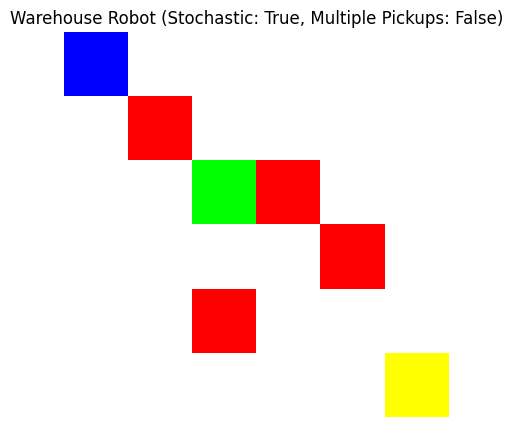

Action: Up, Reward: -1


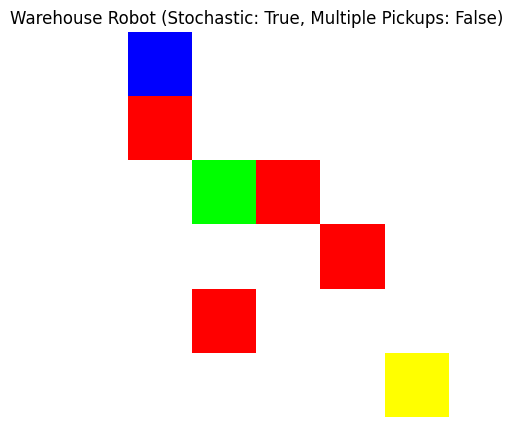

Action: Up, Reward: -1


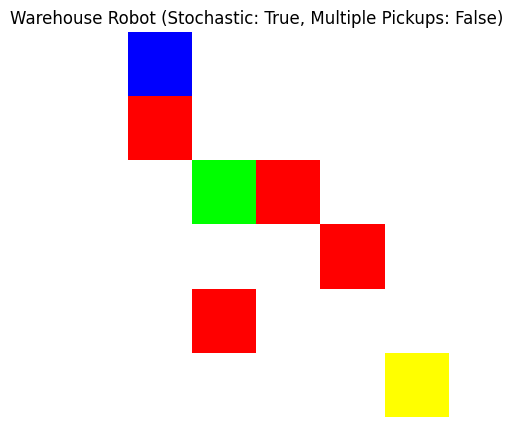

Action: Right, Reward: -20


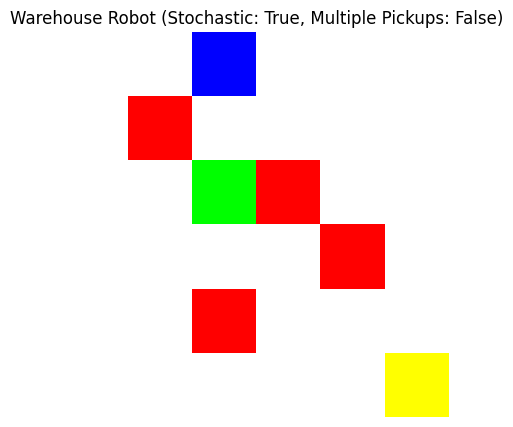

Action: Right, Reward: -1


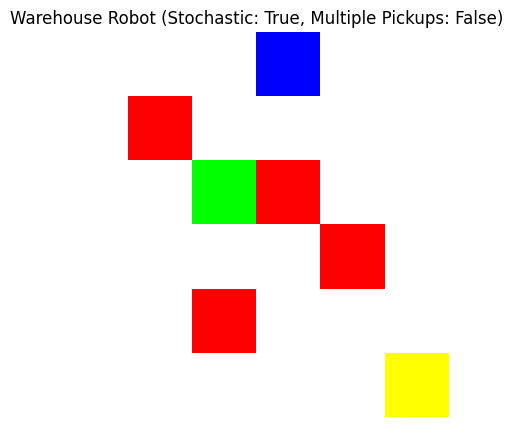

Action: Right, Reward: -1


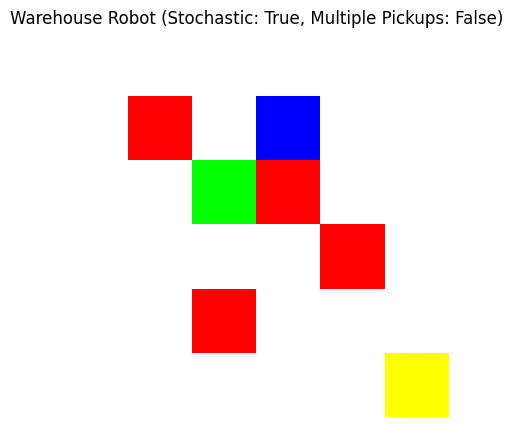

Action: Up, Reward: -1


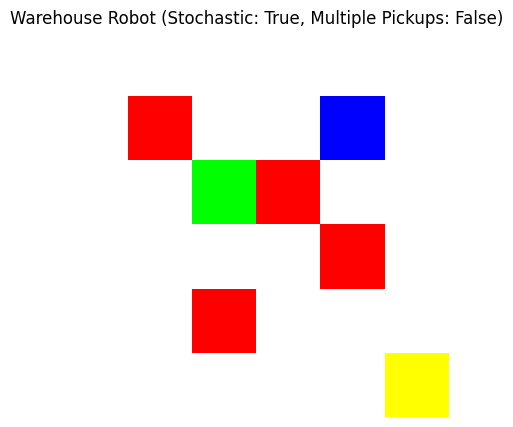

Action: Right, Reward: -1


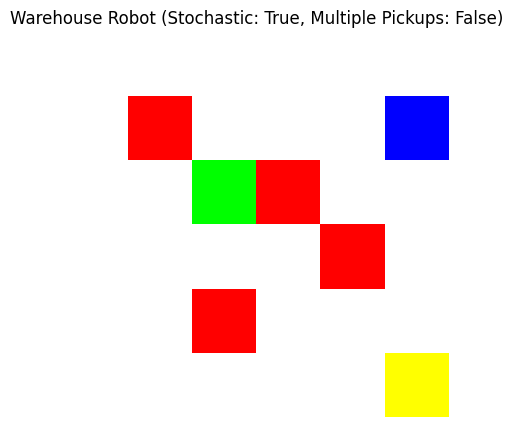

Action: Up, Reward: -1


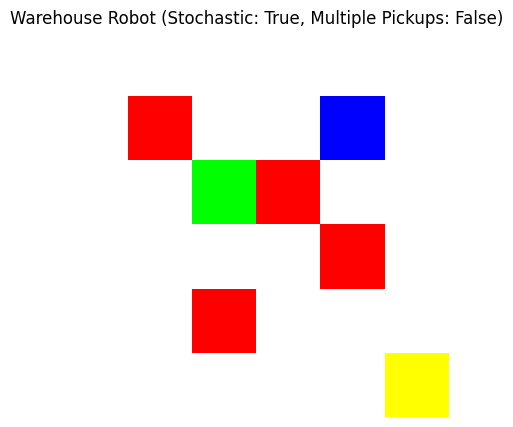

Action: Right, Reward: -1


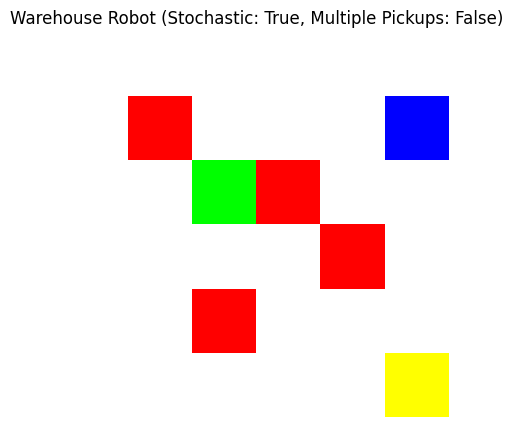

Action: Up, Reward: -1


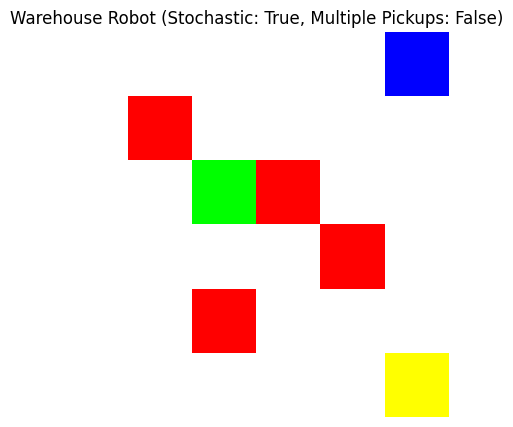

Action: Right, Reward: -1


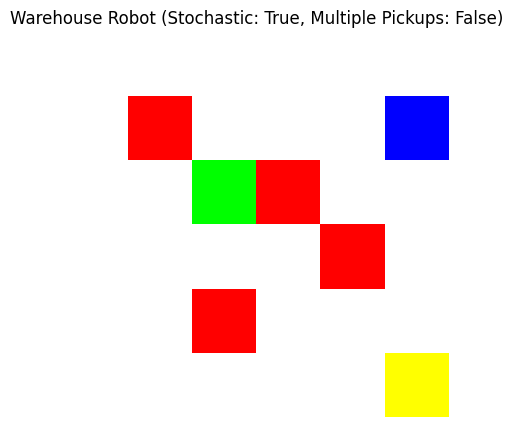

Action: Dropoff, Reward: -1


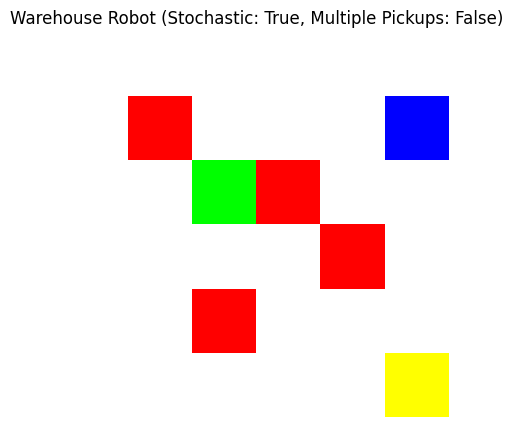

Action: Right, Reward: -1


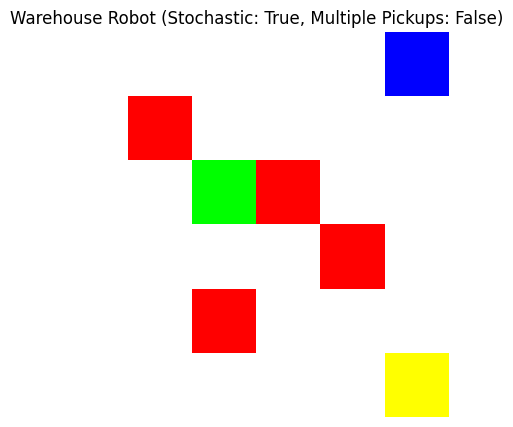

Action: Right, Reward: -1


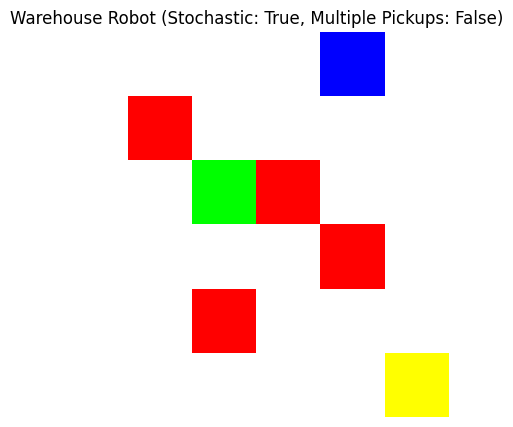

Action: Dropoff, Reward: -1


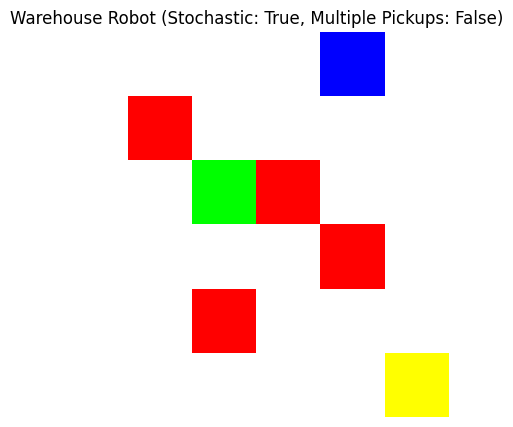

Action: Right, Reward: -1


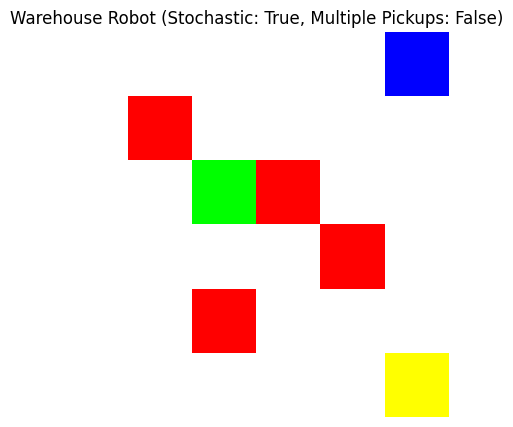

Action: Right, Reward: -1


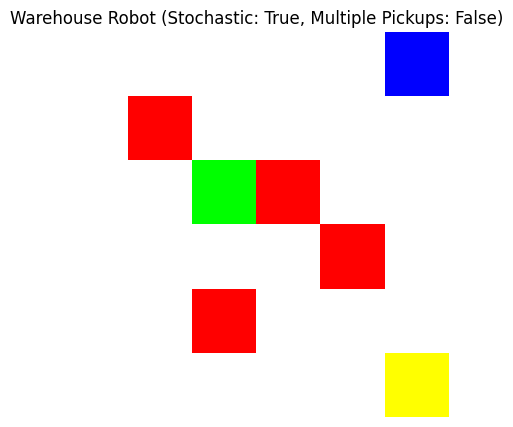

Action: Dropoff, Reward: -1


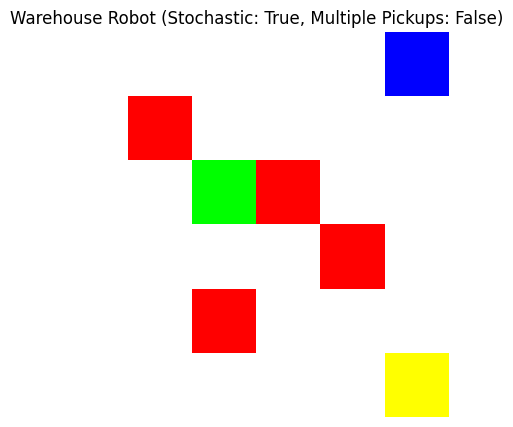

Action: Dropoff, Reward: -1


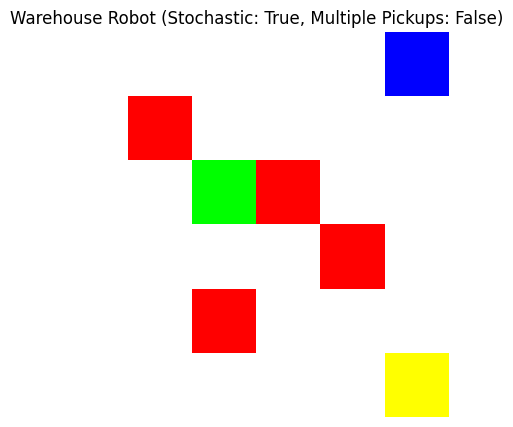

Action: Dropoff, Reward: -1


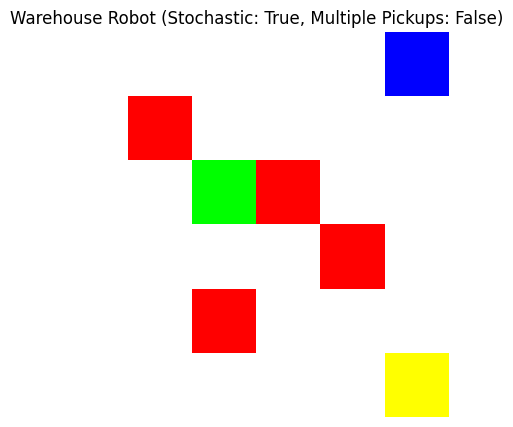

Action: Dropoff, Reward: -1


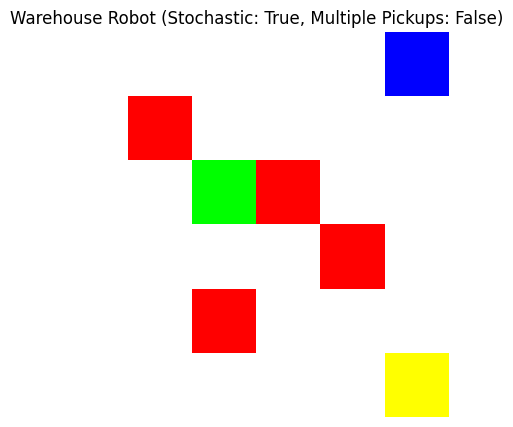

Action: Dropoff, Reward: -1


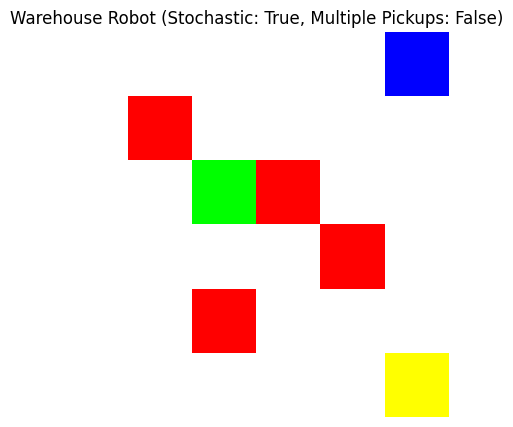

Action: Dropoff, Reward: -1


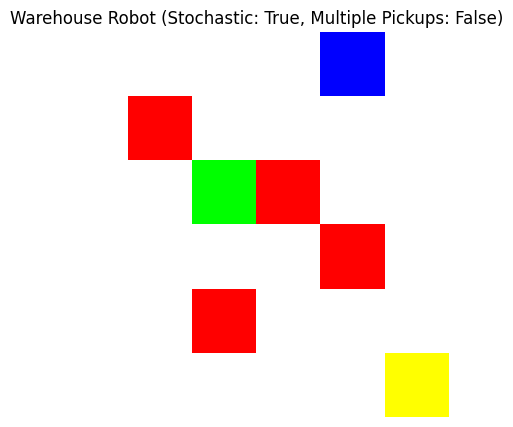

Action: Dropoff, Reward: -1


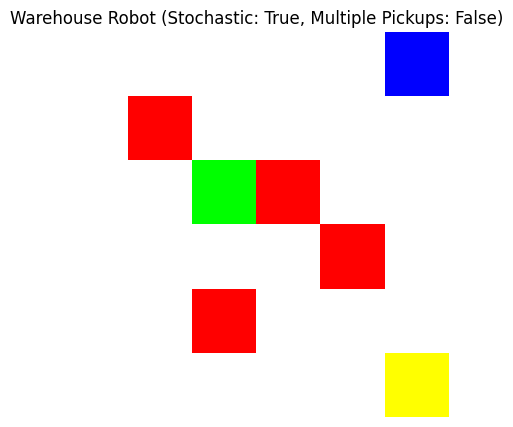

Action: Right, Reward: -1


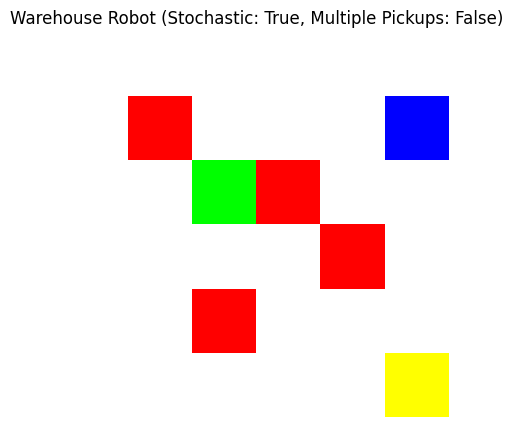

Action: Dropoff, Reward: -1


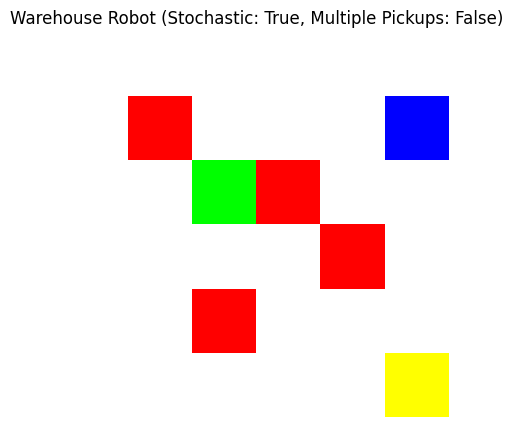

Action: Right, Reward: -1


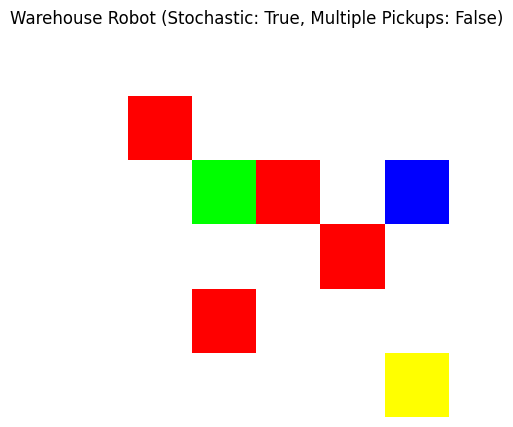

Action: Right, Reward: -1


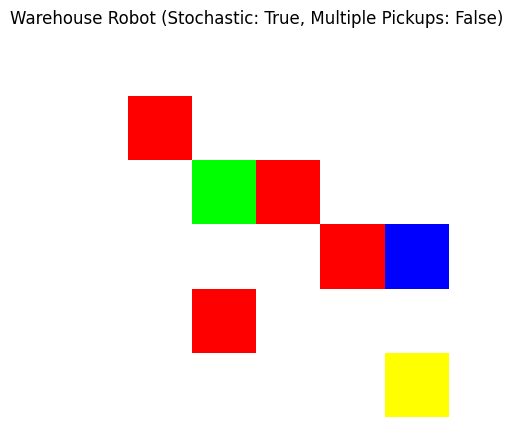

Action: Up, Reward: -1


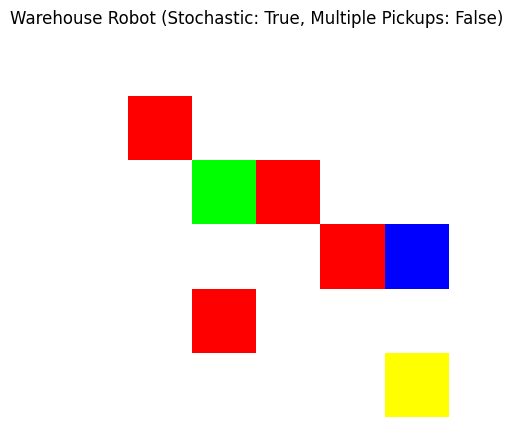

Action: Right, Reward: -20


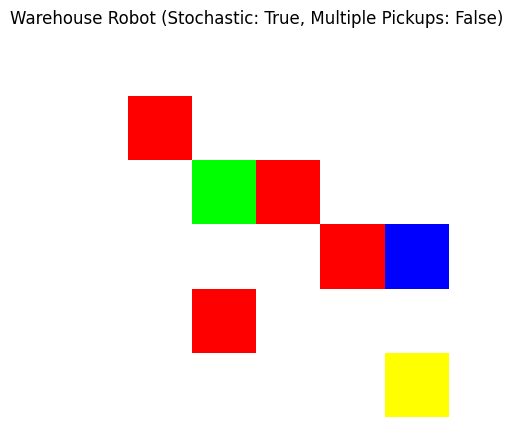

Action: Right, Reward: -1


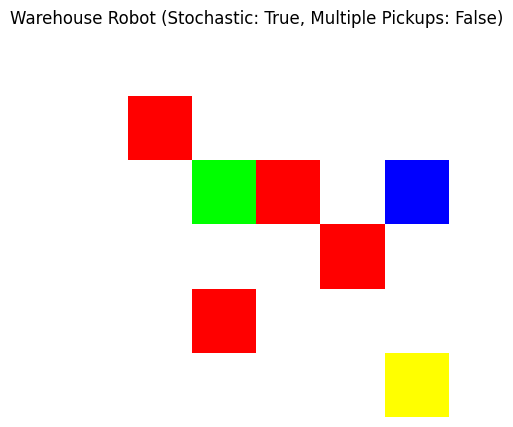

Action: Right, Reward: -1


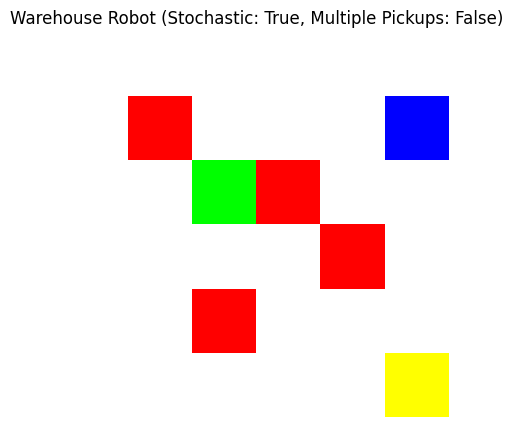

Action: Up, Reward: -1


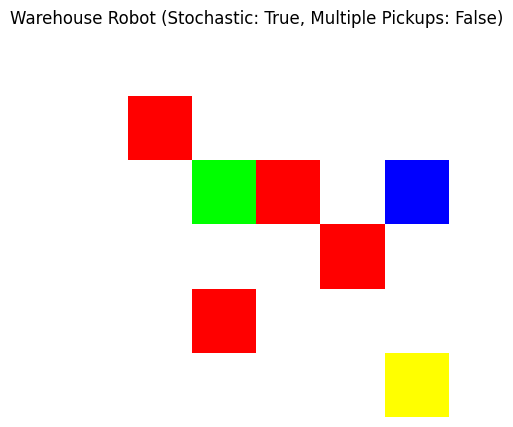

Action: Right, Reward: -1


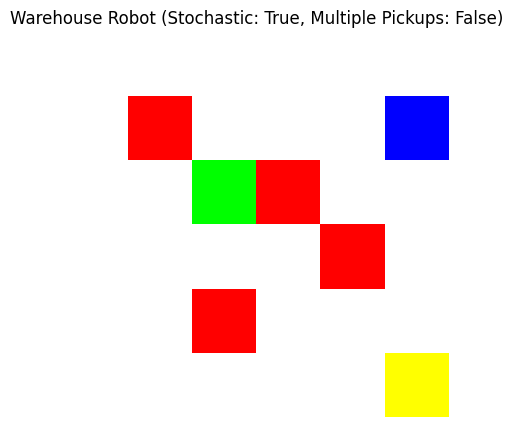

Action: Up, Reward: -1


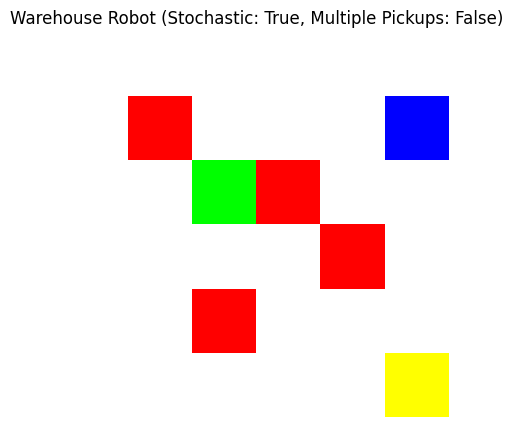

Action: Right, Reward: -1


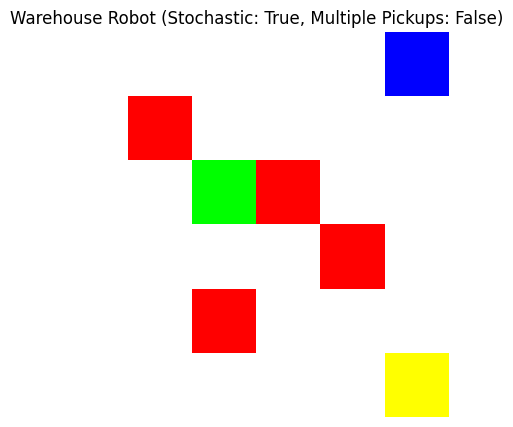

Action: Right, Reward: -1


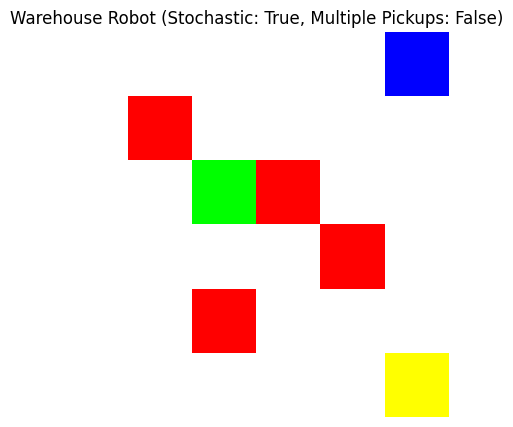

Action: Dropoff, Reward: -1


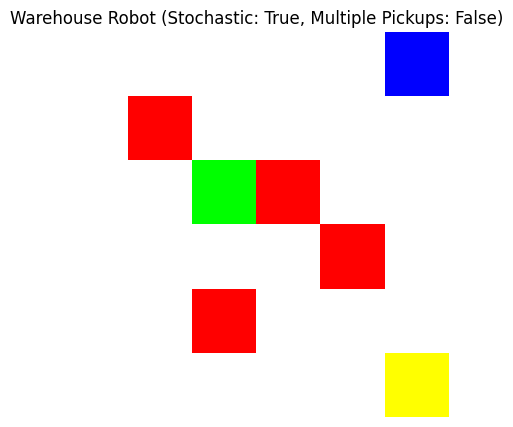

Action: Dropoff, Reward: -1


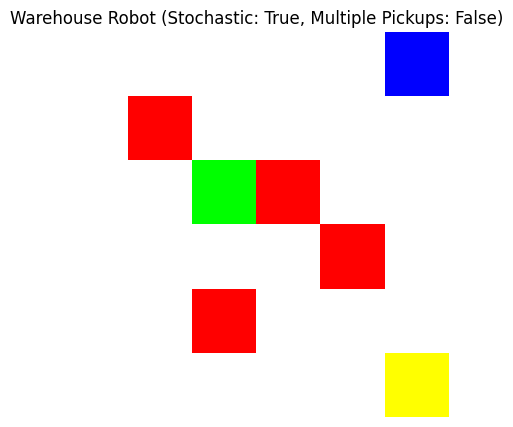

Action: Dropoff, Reward: -1


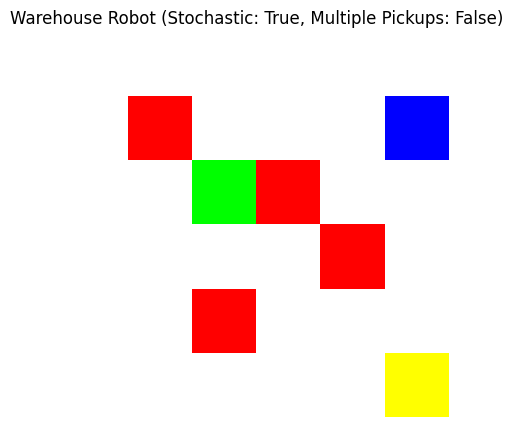

Action: Dropoff, Reward: -1


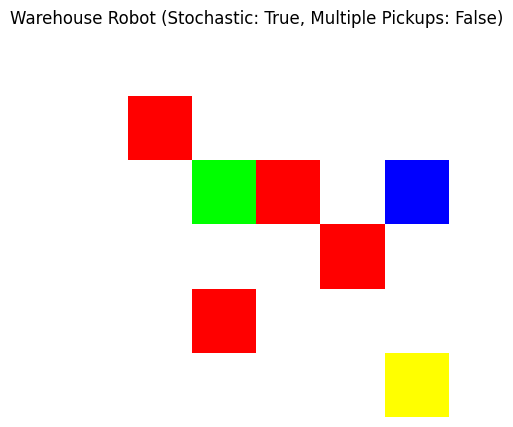

Action: Right, Reward: -1


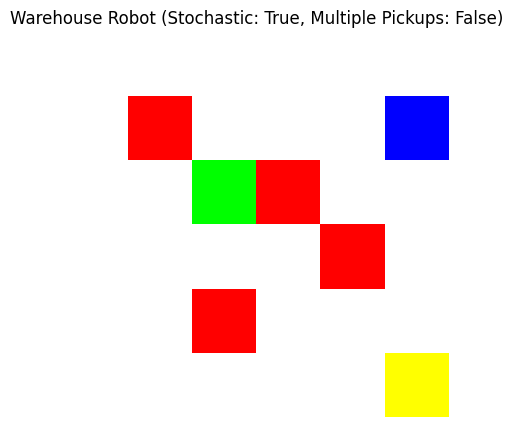

Action: Up, Reward: -1


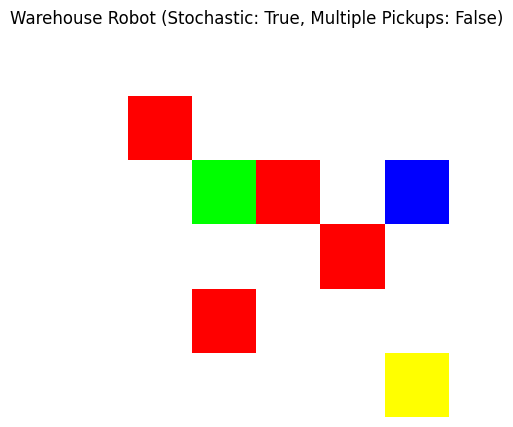

Action: Right, Reward: -1


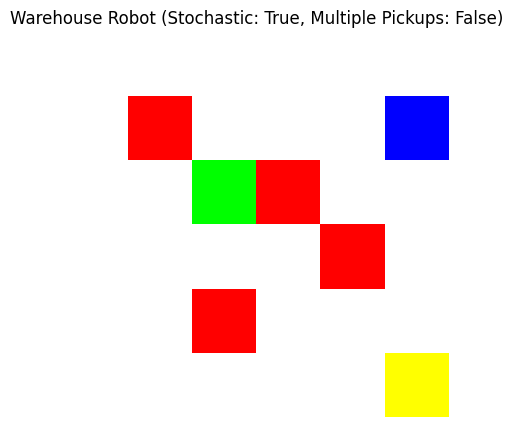

Action: Up, Reward: -1


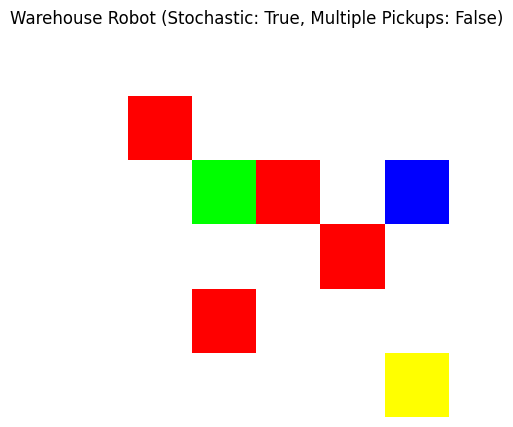

Action: Right, Reward: -1


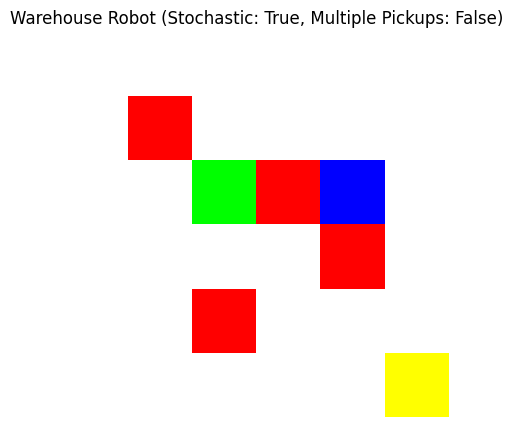

Action: Up, Reward: -1


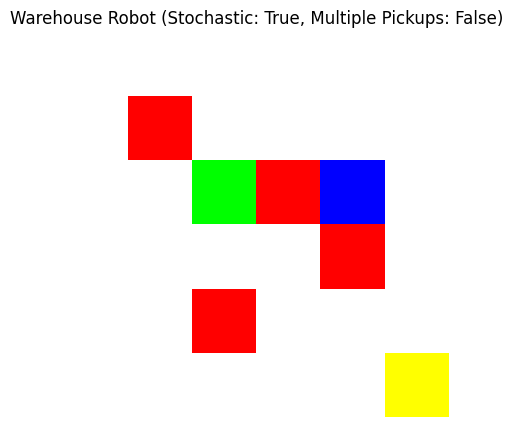

Action: Right, Reward: -20


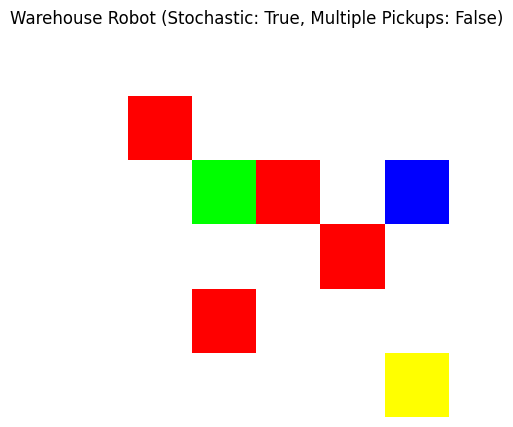

Action: Right, Reward: -1


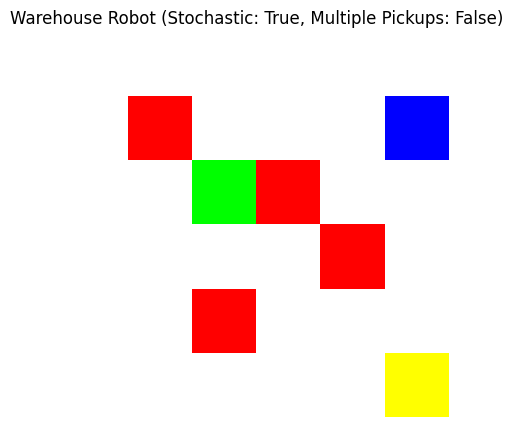

Action: Up, Reward: -1
SARSA Episode 0, Reward: -366, Epsilon: 0.995
SARSA Episode 100, Reward: -309, Epsilon: 0.6027415843082742
SARSA Episode 200, Reward: -271, Epsilon: 0.36512303261753626
SARSA Episode 300, Reward: -385, Epsilon: 0.2211807388415433
SARSA Episode 400, Reward: -302, Epsilon: 0.13398475271138335
SARSA Episode 0, Reward: -404, Epsilon: 0.995
SARSA Episode 100, Reward: -385, Epsilon: 0.6027415843082742
SARSA Episode 200, Reward: -404, Epsilon: 0.36512303261753626
SARSA Episode 300, Reward: -423, Epsilon: 0.2211807388415433
SARSA Episode 400, Reward: -309, Epsilon: 0.13398475271138335
SARSA Episode 0, Reward: -214, Epsilon: 0.995
SARSA Episode 100, Reward: -347, Epsilon: 0.6027415843082742
SARSA Episode 200, Reward: -366, Epsilon: 0.36512303261753626
SARSA Episode 300, Reward: -328, Epsilon: 0.2211807388415433
SARSA Episode 400, Reward: -385, Epsilon: 0.13398475271138335
SARSA Episode 0, Reward: -423, Epsilon: 0.995
SARSA Episode 100, Reward: -328, Epsilon: 0.60274158430

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle

# ==================== Environment Definition ====================
class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False, multiple_pickups=False):
        super().__init__()
        self.grid_size = 6
        self.multiple_pickups = multiple_pickups
        if self.multiple_pickups:
            # Allow up to 2 packages to be carried
            self.max_carry = 2  
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, self.max_carry + 1])
        else:
            # Single package: carrying is Boolean (0 or 1)
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Actions: Up, Down, Left, Right, Pickup, Dropoff
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        if self.multiple_pickups:
            # Define multiple pickup locations
            self.pickup_positions = [[2, 2], [0, 5]]
            self.carrying = 0  # Number of packages carried
        else:
            self.pickup_position = [2, 2]
            self.carrying = False  # Single pickup: carried or not (Boolean)
        self.dropoff_position = [5, 5]
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        if self.multiple_pickups:
            return (self.agent_position[0], self.agent_position[1], self.carrying)
        else:
            return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
        # For stochastic environments: with 90% chance override intended direction with a random one
        if self.stochastic and random.random() < 0.9:
            action = random.choice([0, 1, 2, 3])

        new_pos = self.agent_position.copy()
        if action == 0:
            new_pos[0] -= 1  # Up
        elif action == 1:
            new_pos[0] += 1  # Down
        elif action == 2:
            new_pos[1] -= 1  # Left
        elif action == 3:
            new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if self.multiple_pickups:
            if action == 4:  # Pickup
                if self.agent_position in self.pickup_positions:
                    if self.carrying < self.max_carry:
                        self.carrying += 1
                        reward = 25
                    else:
                        reward = -1  # Already at capacity
                else:
                    reward = -1  # Not at any pickup location
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position:
                    if self.carrying > 0:
                        self.carrying -= 1
                        reward = 100
                    else:
                        reward = -1  # Nothing to drop
        else:
            if action == 4:  # Pickup
                if self.agent_position == self.pickup_position and not self.carrying:
                    self.carrying = True
                    reward = 25
                elif self.carrying:
                    reward = -1
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position and self.carrying:
                    reward = 100
                    terminated = True  # End episode after successful dropoff
                elif self.carrying:
                    reward = -25
                self.carrying = False

        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Time limit reached

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Draw obstacles (red)
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]
        # Draw pickup locations (green)
        if self.multiple_pickups:
            for p in self.pickup_positions:
                grid[p[0], p[1]] = [0, 1, 0]
        else:
            grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]
        # Draw dropoff location (yellow)
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]
        # Draw the agent (blue)
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic}, Multiple Pickups: {self.multiple_pickups})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

# ==================== SARSA Algorithm ====================
def sarsa(env, episodes, max_step=1000, alpha=0.1, gamma=0.99, 
          epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all states (x, y, carrying)
    if env.multiple_pickups:
        carry_range = range(env.max_carry + 1)
    else:
        carry_range = [0, 1]
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in carry_range:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)
        total_reward = 0
        done = False
        step_count = 0

        # Choose initial action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        while not done and step_count < max_step:
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Choose next action using epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state])
            
            # SARSA update rule
            old_value = q_table[state][action]
            q_table[state][action] = old_value + alpha * (reward + gamma * q_table[next_state][next_action] - old_value)
            
            state = next_state
            action = next_action
            total_reward += reward
            step_count += 1
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"SARSA Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

# ==================== Simulation Function ====================
def run_simulation_with_sarsa(stochastic=False, multiple_pickups=False):
    env = WarehouseRobotEnv(stochastic, multiple_pickups)
    episodes = 2000
    q_table, rewards, epsilons = sarsa(env, episodes)
    
    # Save Q-table
    filename = f'sarsa_q_table_{"stochastic" if stochastic else "deterministic"}'
    if multiple_pickups:
        filename += "_multiple_pickups"
    with open(f'{filename}.pkl', 'wb') as file:
        pickle.dump(q_table, file)
    
    # Print sample Q-table entries
    print(f"\nSARSA Q-table sample for {'Stochastic' if stochastic else 'Deterministic'} Environment with " +
          ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ":")
    print("Sample (first entries):", list(q_table.items())[:5])
    print("Sample (last entries):", list(q_table.items())[-5:])

    # Plot total reward per episode
    plt.figure()
    plt.plot(rewards)
    plt.title(f"SARSA Total Reward per Episode\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Plot epsilon decay
    plt.figure()
    plt.plot(epsilons)
    plt.title(f"SARSA Epsilon Decay\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.savefig(f"sarsa_epsilon_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Test learned policy with 10 greedy episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    plt.figure()
    plt.plot(greedy_rewards)
    plt.title(f"SARSA Greedy Policy Rewards\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_greedy_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Render one episode using the learned greedy policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with the SARSA learned policy:")
    for _ in range(50):  # Maximum steps to render
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        actions_map = ['Up', 'Down', 'Left', 'Right', 'Pickup', 'Dropoff']
        print(f"Action: {actions_map[action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state

# ==================== Hyperparameter Tuning ====================
def tune_sarsa(env, episodes, max_step, param_grid, n_trials=3):
    best_params = None
    best_score = -np.inf
    results = []
    for alpha in param_grid['alpha']:
        for gamma in param_grid['gamma']:
            for epsilon in param_grid['epsilon']:
                trial_scores = []
                for trial in range(n_trials):
                    # Run SARSA with the current set of hyperparameters
                    q_table, rewards, _ = sarsa(
                        env,
                        episodes,
                        max_step=max_step,
                        alpha=alpha,
                        gamma=gamma,
                        epsilon=epsilon
                    )
                    # Use average reward over the last 100 episodes as the performance metric
                    avg_reward = np.mean(rewards[-100:]) if len(rewards) >= 100 else np.mean(rewards)
                    trial_scores.append(avg_reward)
                avg_trial_score = np.mean(trial_scores)
                results.append({'alpha': alpha, 'gamma': gamma, 'epsilon': epsilon, 'score': avg_trial_score})
                print(f"alpha: {alpha}, gamma: {gamma}, epsilon: {epsilon}, score: {avg_trial_score}")
                if avg_trial_score > best_score:
                    best_score = avg_trial_score
                    best_params = {'alpha': alpha, 'gamma': gamma, 'epsilon': epsilon}
    print("\nBest hyperparameters:", best_params, "with average reward:", best_score)
    return best_params, results

if __name__ == "__main__":
    # Run SARSA simulation (deterministic environment, single pickup)
    run_simulation_with_sarsa(stochastic=True, multiple_pickups=False)
    
    # For hyperparameter tuning, create an instance of the environment.
    env = WarehouseRobotEnv(stochastic=True, multiple_pickups=False)
    
    # Define a grid for alpha, gamma, and epsilon
    param_grid = {
        'alpha': [0.1, 0.5, 0.9],
        'gamma': [0.95, 0.99],
        'epsilon': [1.0, 0.5]
    }
    
    # Run hyperparameter tuning using SARSA on a reduced number of episodes (for demonstration)
    best_params, results = tune_sarsa(env, episodes=500, max_step=100, param_grid=param_grid, n_trials=10)


Multiple Pickup

SARSA Episode 0, Reward: 30098, Epsilon: 0.4975
SARSA Episode 100, Reward: 104985, Epsilon: 0.3013707921541371
SARSA Episode 200, Reward: 130179, Epsilon: 0.18256151630876813
SARSA Episode 300, Reward: 147475, Epsilon: 0.11059036942077165
SARSA Episode 400, Reward: 155166, Epsilon: 0.06699237635569168
SARSA Episode 500, Reward: 161153, Epsilon: 0.04058200106653845
SARSA Episode 600, Reward: 165889, Epsilon: 0.024583376499744156
SARSA Episode 700, Reward: 167997, Epsilon: 0.014891882712665923
SARSA Episode 800, Reward: 168785, Epsilon: 0.01
SARSA Episode 900, Reward: 169286, Epsilon: 0.01
SARSA Episode 1000, Reward: 169065, Epsilon: 0.01
SARSA Episode 1100, Reward: 169312, Epsilon: 0.01
SARSA Episode 1200, Reward: 169286, Epsilon: 0.01
SARSA Episode 1300, Reward: 169357, Epsilon: 0.01
SARSA Episode 1400, Reward: 168849, Epsilon: 0.01
SARSA Episode 1500, Reward: 169229, Epsilon: 0.01
SARSA Episode 1600, Reward: 169300, Epsilon: 0.01
SARSA Episode 1700, Reward: 169305, Epsilon: 0.01
SARSA

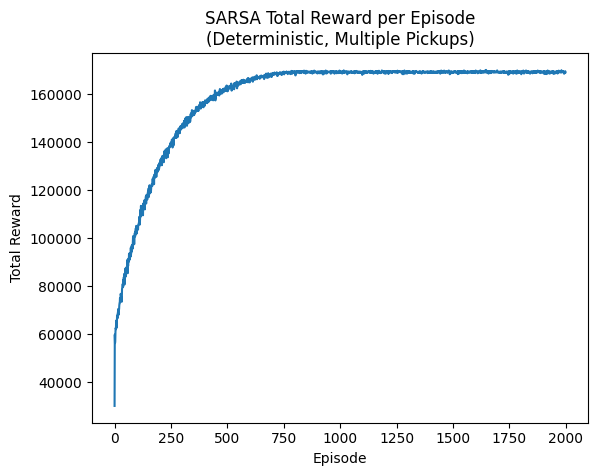

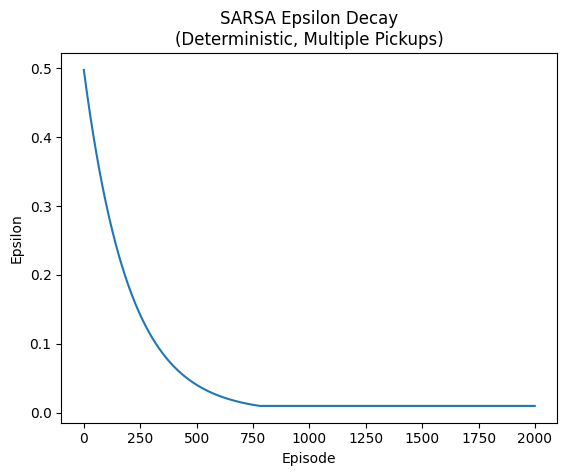

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces
import random
import time
import pickle


# ==================== Environment Definition ====================
class WarehouseRobotEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stochastic=False, multiple_pickups=True):
        super().__init__()
        self.grid_size = 6
        self.multiple_pickups = multiple_pickups
        if self.multiple_pickups:
            # Allow up to 2 packages to be carried (can be extended as needed)
            self.max_carry = 2
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, self.max_carry + 1])
        else:
            # Single package: carrying is Boolean (0 or 1)
            self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])
        self.action_space = spaces.Discrete(6)  # Actions: Up, Down, Left, Right, Pickup, Dropoff
        
        self.stochastic = stochastic
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        if self.multiple_pickups:
            # Define multiple pickup locations
            self.pickup_positions = [[2, 2], [0, 5]]
            self.carrying = 0  # Number of packages carried
        else:
            self.pickup_position = [2, 2]
            self.carrying = False  # Single pickup: carried or not (Boolean)
        self.dropoff_position = [5, 5]
        self.timesteps = 0
        self.total_reward = 0
        self.obstacles = [[1, 1], [2, 3], [4, 2], [3, 4]]
        return self._get_observation(), {}

    def _get_observation(self):
        if self.multiple_pickups:
            return (self.agent_position[0], self.agent_position[1], self.carrying)
        else:
            return (self.agent_position[0], self.agent_position[1], int(self.carrying))
    
    def step(self, action):
        # Handle stochastic movement: if stochastic, with 90% probability override intended action with a random direction
        if self.stochastic and random.random() < 0.1:
            print("Stochastic: Staying in place")
            return self._get_observation(), -1, False, False, {}

        new_pos = self.agent_position.copy()
        if action == 0:
            new_pos[0] -= 1  # Up
        elif action == 1:
            new_pos[0] += 1  # Down
        elif action == 2:
            new_pos[1] -= 1  # Left
        elif action == 3:
            new_pos[1] += 1  # Right

        reward = -1  # Default step penalty
        terminated = False
        truncated = False

        # Check obstacle collision
        if new_pos in self.obstacles:
            reward = -20
        elif 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_position = new_pos

        # Handle package operations
        if self.multiple_pickups:
            # For multiple pickups, allow carrying up to max_carry packages
            if action == 4:  # Pickup
                if self.agent_position in self.pickup_positions:
                    if self.carrying < self.max_carry:
                        self.carrying += 1
                        reward = 25
                    else:
                        reward = -1  # Already at capacity
                else:
                    reward = -1  # Not at any pickup location
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position:
                    if self.carrying > 0:
                        self.carrying -= 1
                        reward = 100
                    else:
                        reward = -1  # Nothing to drop
        else:
            # Single pickup scenario
            if action == 4:  # Pickup
                if self.agent_position == self.pickup_position and not self.carrying:
                    self.carrying = True
                    reward = 25
                elif self.carrying:
                    reward = -1
            elif action == 5:  # Dropoff
                if self.agent_position == self.dropoff_position and self.carrying:
                    reward = 100
                    terminated = True  # Terminate episode after successful drop-off
                elif self.carrying:
                    reward = -25
                self.carrying = False

        self.timesteps += 1
        if self.timesteps >= 50:
            truncated = True  # Episode termination due to time limit

        self.total_reward += reward
        return self._get_observation(), reward, terminated, truncated, {}

    def render(self):
        grid = np.ones((self.grid_size, self.grid_size, 3))
        
        # Draw obstacles in red
        for obs in self.obstacles:
            grid[obs[0], obs[1]] = [1, 0, 0]
        # Draw pickup locations in green
        if self.multiple_pickups:
            for p in self.pickup_positions:
                grid[p[0], p[1]] = [0, 1, 0]
        else:
            grid[self.pickup_position[0], self.pickup_position[1]] = [0, 1, 0]
        # Draw dropoff location in yellow
        grid[self.dropoff_position[0], self.dropoff_position[1]] = [1, 1, 0]
        # Draw agent in blue
        grid[self.agent_position[0], self.agent_position[1]] = [0, 0, 1]

        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.title(f"Warehouse Robot (Stochastic: {self.stochastic}, Multiple Pickups: {self.multiple_pickups})")
        plt.axis('off')
        plt.show()
        time.sleep(0.1)

# ==================== SARSA Algorithm ====================
# Best hyperparameters: {'alpha': 0.1, 'gamma': 0.99, 'epsilon': 0.5} with average reward: 112.06666666666666
def sarsa(env, episodes, max_step=10000, alpha=0.3, gamma=0.99, 
          epsilon=0.5, epsilon_decay=0.995, epsilon_min=0.01):
    q_table = {}
    rewards_per_episode = []
    epsilon_values = []

    # Initialize Q-table for all possible states
    if env.multiple_pickups:
        carry_range = range(env.max_carry + 1)
    else:
        carry_range = [0, 1]
    for x in range(env.grid_size):
        for y in range(env.grid_size):
            for carrying in carry_range:
                q_table[(x, y, carrying)] = np.zeros(env.action_space.n)
    
    for episode in range(episodes):
        state, _ = env.reset()
        state = tuple(state)  # Convert to tuple for hashing
        total_reward = 0
        done = False
        step_count = 0

        # Choose initial action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        while not done and step_count < max_step:
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)

            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)
            
            # Choose next action using epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state])
            
            # SARSA update rule:
            old_value = q_table[state][action]
            q_table[state][action] = old_value + alpha * (reward + gamma * q_table[next_state][next_action] - old_value)
            
            state = next_state
            action = next_action
            total_reward += reward
            step_count += 1
        
        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)

        if episode % 100 == 0:
            print(f"SARSA Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon}")
    
    return q_table, rewards_per_episode, epsilon_values

# ==================== Simulation Function ====================
def run_simulation_with_sarsa(stochastic=False, multiple_pickups=True):
    env = WarehouseRobotEnv(stochastic, multiple_pickups)
    episodes = 2000
    q_table, rewards, epsilons = sarsa(env, episodes)
    
    # Save Q-table
    filename = f'sarsa_q_table_{"stochastic" if stochastic else "deterministic"}'
    if multiple_pickups:
        filename += "_multiple_pickups"
    with open(f'{filename}.pkl', 'wb') as file:
        pickle.dump(q_table, file)
    
    # Display sample Q-table entries
    print(f"\nSARSA Q-table sample for {'Stochastic' if stochastic else 'Deterministic'} Environment with " +
          ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ":")
    print("Sample (first entries):", list(q_table.items())[:5])
    print("Sample (last entries):", list(q_table.items())[-5:])

    # Plot total reward per episode
    plt.figure()
    plt.plot(rewards)
    plt.title(f"SARSA Total Reward per Episode\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Plot epsilon decay
    plt.figure()
    plt.plot(epsilons)
    plt.title(f"SARSA Epsilon Decay\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.savefig(f"sarsa_epsilon_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Test the learned policy with 10 greedy episodes
    greedy_rewards = []
    for _ in range(10):
        state, _ = env.reset()
        state = tuple(state)
        episode_reward = 0
        while True:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            next_state = tuple(next_state)
            episode_reward += reward
            if done:
                break
            state = next_state
        greedy_rewards.append(episode_reward)
    
    plt.figure()
    plt.plot(greedy_rewards)
    plt.title(f"SARSA Greedy Policy Rewards\n({'Stochastic' if stochastic else 'Deterministic'}, " +
              ("Multiple Pickups" if multiple_pickups else "Single Pickup") + ")")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig(f"sarsa_greedy_reward_plot_{'stochastic' if stochastic else 'deterministic'}_" +
                ("multiple.png" if multiple_pickups else "single.png"))
    plt.show()

    # Render one episode using the learned greedy policy
    state, _ = env.reset()
    state = tuple(state)
    print("\nRendering one episode with the SARSA learned policy:")
    for _ in range(50):  # Maximum steps to render
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state)
        env.render()
        actions_map = ['Up', 'Down', 'Left', 'Right', 'Pickup', 'Dropoff']
        print(f"Action: {actions_map[action]}, Reward: {reward}")
        if done:
            print("Task Completed!")
            break
        state = next_state


if __name__ == "__main__":
    # Run SARSA on deterministic environment (single pickup)
    run_simulation_with_sarsa(stochastic=False, multiple_pickups=True)